In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('1인가구자료조사/2019년자료.csv',encoding='cp949')




In [40]:
temp_df =df.copy()

In [41]:
temp_df

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,...,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드
0,201900,1,2,1,0,0,0,0,1,1,...,0,99416,0,15190,0,0,4893,50000,29333,1
1,201900,2,1,3,2,0,0,0,1,2,...,3333,316357,37697,0,0,110160,0,142500,26000,1
2,201900,3,2,1,0,0,0,0,1,1,...,0,9206,0,0,4050,3728,0,0,1429,1
3,201900,4,1,3,2,0,0,1,0,2,...,0,445731,71766,0,245393,104001,4857,7143,12571,1
4,201900,5,1,1,1,0,0,0,1,1,...,525514,359537,13844,0,65571,50121,0,57143,172857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,201900,9506,2,4,2,0,0,1,0,2,...,0,1538751,95328,0,8370,142911,1075742,55000,161400,0
9506,201900,9507,2,4,3,0,0,1,0,2,...,0,685210,8298,0,0,47612,422300,181000,26000,0
9507,201900,9508,2,5,3,0,0,1,0,3,...,0,1459269,96528,0,174473,72436,304014,640909,170909,0
9508,201900,9509,1,1,1,0,0,0,1,1,...,454545,117633,24609,0,0,26887,0,65227,909,0


In [42]:
# 변수정리  

temp_df.rename(columns={
    '가계지출금액': '전체소비지출',
    '가계지출_소비지출금액': '소비지출',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품음료구입',
    '가계지출_소비지출_식료품비주류음료_곡물구입비': '식료품_곡물구입',
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비': '식료품_곡물가공품구입',
    '가계지출_소비지출_식료품비주류음료_빵떡류구입비': '식료품_빵떡류구입',
    '가계지출_소비지출_식료품비주류음료_육류구입비': '식료품_육류구입',
    '가계지출_소비지출_식료품비주류음료_육류가공품구입비': '식료품_육류가공품구입',
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비': '식료품_신선수산동물구입',
    '가계지출_소비지출_식료품비주류음료_염건수산동물구입비': '식료품_염건수산동물구입',
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비': '식료품_기타수산동물가공구입',
    '가계지출_소비지출_식료품비주류음료_유제품및알구입비': '식료품_유제품알구입',
    '가계지출_소비지출_식료품비주류음료_유지류구입비': '식료품_유지류구입',
    '가계지출_소비지출_식료품비주류음료_과일가공품구입비': '식료품_과일가공품구입',
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비': '식료품_채소가공품구입',
    '가계지출_소비지출_식료품비주류음료_해조가공품구입비': '식료품_해조가공품구입',
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비': '식료품_당류과자류구입',
    '가계지출_소비지출_식료품비주류음료_조미식품구입비': '식료품_조미식품구입',
    '가계지출_소비지출_식료품비주류음료_기타식품구입비': '식료품_기타식품구입',
    '가계지출_소비지출_식료품비주류음료_커피차구입비': '식료품_커피차구입',
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비': '식료품_쥬스음료구입',
    '가계지출_소비지출_주류담배구입비': '주류담배구입',
    '가계지출_소비지출_주류담배_주류구입비': '주류구입',
    '가계지출_소비지출_주류담배_담배구입비': '담배구입',
    '가계지출_소비지출_의류신발구입비': '의류신발구입',
    '가계지출_소비지출_의류신발_직물및외의구입비': '의류신발_직물및외의구입',
    '가계지출_소비지출_의류신발_내의구입비': '의류신발_내의구입',
    '가계지출_소비지출_의류신발_기타의복구입비': '의류신발_기타의복구입',
    '가계지출_소비지출_의류신발_의복관련서비스구입비': '의류신발_의복관련서비스구입',
    '가계지출_소비지출_의류신발_신발구입비': '의류신발_신발구입',
    '가계지출_소비지출_의류신발_신발서비스구입비': '의류신발_신발서비스구입',
    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_주거수도광열_실제주거비구입비': '주거수도광열_실제주거비구입',
    '가계지출_소비지출_주거수도광열_주택유지수선구입비': '주거수도광열_주택유지수선구입',
    '가계지출_소비지출_주거수도광열_상하수도폐기물처리비': '주거수도광열_상하수도폐기물처리',
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비': '주거수도광열_기타주거관련서비스구입',
    '가계지출_소비지출_주거수도광열_연료비구입비': '주거수도광열_연료비구입',
    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가구조명구입비': '가정용품가사서비스_가구조명구입',
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비': '가정용품가사서비스_실내장식구입',
    '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액': '가정용품가사서비스_가구조명장식서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비': '가정용품가사서비스_가정용섬유구입',
    '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비': '가정용품가사서비스_가전가정용기기구입',
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액': '가정용품가사서비스_가전관련서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가사용품구입비': '가정용품가사서비스_가사용품구입',
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비': '가정용품가사서비스_가정용공구기타구입',
    '가계지출_소비지출_가정용품가사서비스_가사소모품구입비': '가정용품가사서비스_가사소모품구입',
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액': '가정용품가사서비스_가사서비스',
    '가계지출_소비지출_보건제품구입비': '보건제품구입',
    '가계지출_소비지출_보건_의약품구입비': '보건_의약품구입',
    '가계지출_소비지출_보건_의료용소모품구입비': '보건_의료용소모품구입',
    '가계지출_소비지출_보건_보건의료용품기구구입비': '보건_보건의료용품기구구입',
    '가계지출_소비지출_보건_외래의료서비스이용금액': '보건_외래의료서비스이용',
    '가계지출_소비지출_보건_치과서비스이용금액': '보건_치과서비스이용',
    '가계지출_소비지출_보건_기타의료서비스이용금액': '보건_기타의료서비스이용',
    '가계지출_소비지출_보건_입원서비스이용금액': '보건_입원서비스이용',
    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_교통_자동차구입비': '교통_자동차구입',
    '가계지출_소비지출_교통_기타운송기구구입비': '교통_기타운송기구구입',
    '가계지출_소비지출_교통_운송기구유지수리비': '교통_운송기구유지수리',
    '가계지출_소비지출_교통_운송기구연료비': '교통_운송기구연료',
    '가계지출_소비지출_교통_기타개인교통서비스이용금액': '교통_기타개인교통서비스이용',
    '가계지출_소비지출_교통_철도운송금액': '교통_철도운송',
    '가계지출_소비지출_교통_육상운송금액': '교통_육상운송',
    '가계지출_소비지출_교통_기타운송금액': '교통_기타운송',
    '가계지출_소비지출_교통_기타교통관련서비스이용금액': '교통_기타교통관련서비스이용',
    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_통신_우편서비스이용금액': '통신_우편서비스이용',
    '가계지출_소비지출_통신_통신장비구입비': '통신_통신장비구입',
    '가계지출_소비지출_통신_통신서비스이용금액': '통신_통신서비스이용',
    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_오락문화_영상음향기기구입비': '오락문화_영상음향기기구입',
    '가계지출_소비지출_오락문화_사진광학장비구입비': '오락문화_사진광학장비구입',
    '가계지출_소비지출_오락문화_정보처리장치구입비': '오락문화_정보처리장치구입',
    '가계지출_소비지출_오락문화_기록매체구입비': '오락문화_기록매체구입',
    '가계지출_소비지출_오락문화_영상음향정보기기수리비': '오락문화_영상음향정보기기수리',
    '가계지출_소비지출_오락문화_내구재구입비': '오락문화_내구재구입',
    '가계지출_소비지출_오락문화_악기기구구입비': '오락문화_악기기구구입',
    '가계지출_소비지출_오락문화_오락문화내구재유지수리비': '오락문화_오락문화내구재유지수리',
    '가계지출_소비지출_오락문화_장난감취미용품구입비': '오락문화_장난감취미용품구입',
    '가계지출_소비지출_오락문화_캠핑운동관련용품구입비': '오락문화_캠핑운동관련용품구입',
    '가계지출_소비지출_오락문화_화훼관련용품구입비': '오락문화_화훼관련용품구입',
    '가계지출_소비지출_오락문화_가족소비관광서비스이용금액': '오락문화_가족소비관광서비스이용',
    '가계지출_소비지출_오락문화_기타오락문화서비스이용금액': '오락문화_기타오락문화서비스이용',
    '가계지출_소비지출_오락문화_영화공연관람비': '오락문화_영화공연관람',
    '가계지출_소비지출_오락문화_음반영상물구입비': '오락문화_음반영상물구입',
    '가계지출_소비지출_오락문화_여행운동관련서비스이용금액': '오락문화_여행운동관련서비스이용',
    '가계지출_소비지출_오락문화_숙박관련서비스이용금액': '오락문화_숙박관련서비스이용',
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_교육_교육비상품서비스이용금액': '교육_교육비상품서비스이용',
    '가계지출_소비지출_교육_교과서비스구입비': '교육_교과서비스구입',
    '가계지출_소비지출_교육_기타교육비상품서비스이용금액': '교육_기타교육비상품서비스이용',
    '가계지출_소비지출_교육_교과서비스외서구입비': '교육_교과서비스외서구입',
    '가계지출_소비지출_교육_외국어서적구입비': '교육_외국어서적구입',
    '가계지출_소비지출_교육_기타서적구입비': '교육_기타서적구입',
    '가계지출_소비지출_교육_전자교과서비스이용금액': '교육_전자교과서비스이용',
    '가계지출_소비지출_교육_기타교육서비스이용금액': '교육_기타교육서비스이용',
    '가계지출_소비지출_교육_직업훈련서비스이용금액': '교육_직업훈련서비스이용',
    '가계지출_소비지출_교육_취미서비스이용금액': '교육_취미서비스이용',
    '가계지출_소비지출_교육_미술학원서비스이용금액': '교육_미술학원서비스이용',
    '가계지출_소비지출_교육_음악학원서비스이용금액': '교육_음악학원서비스이용',
    '가계지출_소비지출_교육_기타교육학원서비스이용금액': '교육_기타교육학원서비스이용',
    '가계지출_소비지출_교육_기타교육관련서비스이용금액': '교육_기타교육관련서비스이용',
    '가계지출_소비지출_음식외식비': '음식외식비',
    '가계지출_소비지출_음식외식_외식음식비': '외식음식비',
    '가계지출_소비지출_음식외식_휴게음식비': '휴게음식비',
    '가계지출_소비지출_음식외식_음식재료비': '음식재료비',
    '가계지출_소비지출_음식외식_간식비': '간식비',
    '가계지출_소비지출_음식외식_식음료조제서비스이용금액': '식음료조제서비스이용',
    '가계지출_소비지출_음식외식_식음료종합소매업이용금액': '식음료종합소매업이용',
    '가계지출_소비지출_음식외식_농수산물구입비': '농수산물구입',
    '가계지출_소비지출_음식외식_식음료종합소매업이용비': '식음료종합소매업이용',
    '가계지출_소비지출_기타상품서비스이용금액': '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비': '기타서비스금액구입',
    '가계지출_비소비지출금액': '비소비지출금액',
    '가계지출_비소비지출_경상조세': '비경상조세',
    '가계지출_비소비지출_비경상조세': '비경상조세',
    '가계지출_비소비지출_연금기여금': '연금기여금'
}, inplace=True)

temp_df.rename(columns={
    '가계지출_소비지출_오락문화_애완동물관련물품구입비': '애완동물_물품구입',
    '가계지출_소비지출_오락문화_화훼애완동물서비스이용금액': '애완동물_서비스이용',
    '가계지출_소비지출_오락문화_운동오락서비스이용금액': '운동오락_서비스이용',
    '가계지출_소비지출_오락문화_문화서비스이용금액': '문화_서비스이용',
    '가계지출_소비지출_오락문화_복권구입비': '복권_구입비',
    '가계지출_소비지출_오락문화_서적구입비': '서적_구입비',
    '가계지출_소비지출_오락문화_기타인쇄물구입비': '인쇄물_구입비',
    '가계지출_소비지출_오락문화_문구구입비': '문구_구입비',
    '가계지출_소비지출_오락문화_단체여행경비': '단체여행_경비',
    '교육비': '교육비',
    '가계지출_소비지출_교육_정규교육비': '정규교육비',
    '가계지출_소비지출_교육_초등교육비': '초등교육비',
    '가계지출_소비지출_교육_중등교육비': '중등교육비',
    '가계지출_소비지출_교육_고등교육비': '고등교육비',
    '가계지출_소비지출_교육_학원보습교육비': '학원보습교육비',
    '가계지출_소비지출_교육_학생학원교육비': '학생학원교육비',
    '가계지출_소비지출_교육_성인학원비': '성인학원비',
    '가계지출_소비지출_교육_기타교육비': '기타교육비',
    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_음식숙박_식대': '식대',
    '가계지출_소비지출_음식숙박_숙박비': '숙박비',
    '기타상품서비스이용': '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액': '이미용서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용기기구입비': '이미용기기구입',
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비': '위생이미용용품구입',
    '가계지출_소비지출_기타상품서비스_시계장신구구입비': '시계장신구구입',
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비': '기타개인용품구입',
    '가계지출_소비지출_기타상품서비스_복지시설비용금액': '복지시설비용',
    '가계지출_소비지출_기타상품서비스_보험료': '보험료',
    '가계지출_소비지출_기타상품서비스_기타금융구입비': '기타금융구입',
    '기타서비스금액구입': '기타서비스금액구입',
    '비소비지출금액': '비소비지출금액',
    '비경상조세': '비경상조세',
    '연금기여금': '연금기여금',
    '가계지출_비소비지출_사회보장구입비': '사회보장구입비',
    '가계지출_비소비지출_이자비용': '이자비용',
    '가계지출_비소비지출_가구간이전지출금액': '가구간이전지출금액',
    '가계지출_비소비지출_비영리단체이전지출금액': '비영리단체이전지출금액'
}, inplace=True)

In [43]:
# 행 전처리

temp_df = temp_df[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드', '자동차보유대수',
           '입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입', '비소비지출금액',
           '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용', '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드']]


In [44]:
temp_df['가구구분코드'] = temp_df['가구구분코드'].replace({1:'근로자 가구',2:'비근로자 가구'})
temp_df['노인가구여부'] = temp_df['노인가구여부'].replace({0:'아니요',1:'예'})
temp_df['배우자코드'] = temp_df['배우자코드'].replace({1:'현재(동거)',2:'비근로자 가구',3:'부재'})
temp_df['가구주_성별코드'] = temp_df['가구주_성별코드'].replace({1:'남성',2:'여성'})
temp_df['가구주_취업여부'] = temp_df['가구주_취업여부'].replace({1:'취업',2:'실업자'})
temp_df['거처구분코드'] = temp_df['거처구분코드'].replace({1: '단독주택(다세대 포함)', 2: '아파트', 3: '연립주택', 4: '다가구주택', 5: '비주거용 건물', 6: '오피스텔', 7: '기타'})
temp_df['입주형태코드'] = temp_df['입주형태코드'].replace({1: '내 집', 2: '무료주택', 3: '회사주택', 4: '임대', 5: '영구임대', 6: '보증금 월세', 7: '보증금 없는 월세'})
temp_df['소득구간코드'] = temp_df['소득구간코드'].replace({1: '100만원 미만', 2: '100~200만원', 3: '200~300만원', 4: '300~400만원', 5: '400~500만원', 6: '500~600만원', 7: '600~700만원', 8: '700만원 이상'})
temp_df['도시읍면부구분코드'] = temp_df['도시읍면부구분코드'].replace({0:'비도시', 1:'도시'})


In [45]:
def age(가구주_연령):
    if 가구주_연령 < 20:
        return '10대'
    elif 20 <= 가구주_연령 < 30:
        return '20대'
    elif 30 <= 가구주_연령 < 40:
        return '30대'
    elif 40 <= 가구주_연령 < 50:
        return '40대'
    elif 50 <= 가구주_연령 < 60:
        return '50대'
    elif 60 <= 가구주_연령 < 70:
        return '60대'
    else:
        return '70대 이상'

# 데이터 연령대별 구분
temp_df.loc[:, '연령대'] = temp_df['가구주_연령'].apply(age)
temp_df.head()

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,가구주_취업여부,...,비경상조세,비경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드,연령대
0,201900,1,비근로자 가구,1,0,아니요,비근로자 가구,여성,64,실업자,...,15190,0,15190,0,0,4893,50000,29333,도시,60대
1,201900,2,근로자 가구,3,2,아니요,현재(동거),남성,63,취업,...,0,37697,0,0,110160,0,142500,26000,도시,60대
2,201900,3,비근로자 가구,1,0,아니요,부재,남성,58,실업자,...,0,0,0,4050,3728,0,0,1429,도시,50대
3,201900,4,근로자 가구,3,2,아니요,현재(동거),남성,29,취업,...,0,71766,0,245393,104001,4857,7143,12571,도시,20대
4,201900,5,근로자 가구,1,1,아니요,부재,여성,58,취업,...,0,13844,0,65571,50121,0,57143,172857,도시,50대


전처리

In [46]:
total_expend = temp_df['소비지출']
total_expend.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9510 entries, 0 to 9509
Series name: 소비지출
Non-Null Count  Dtype
--------------  -----
9510 non-null   int64
dtypes: int64(1)
memory usage: 74.4 KB


전체가구 박스플롯

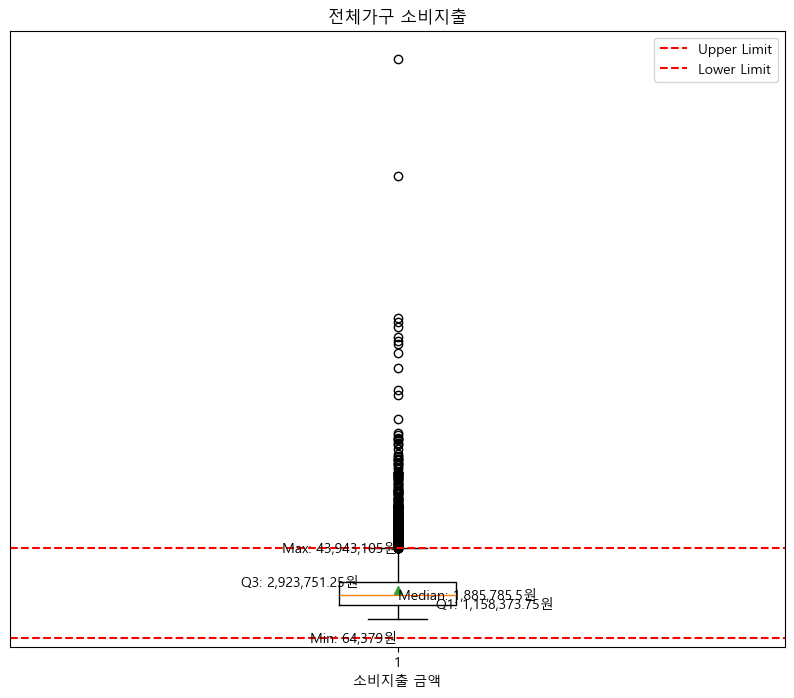

In [47]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(total_expend, 25)
Q3 = np.percentile(total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')  # 오른쪽에 출력
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, np.median(total_expend), f'Median: {np.median(total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')  # 왼쪽에 출력
plt.text(1, lower_limit, f'Min: {np.min(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, upper_limit, f'Max: {np.max(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력

plt.title('전체가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

전체가구 이상치 제거

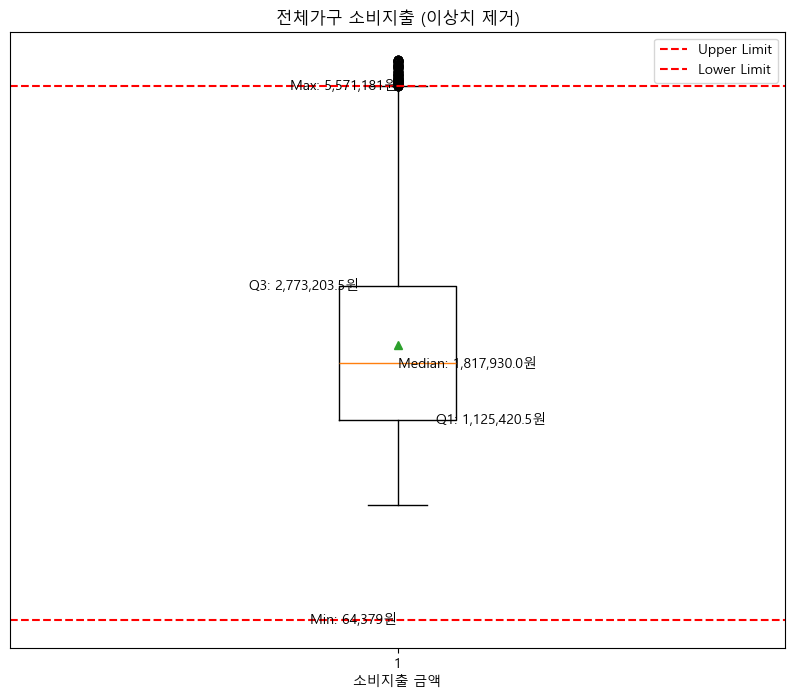

In [48]:
# 이상치 제거

# 이상치 제거
cleaned_total_expend = total_expend[(total_expend >= lower_limit) & (total_expend <= upper_limit)]

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(cleaned_total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(cleaned_total_expend, 25)
Q3 = np.percentile(cleaned_total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left') 
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, np.median(cleaned_total_expend), f'Median: {np.median(cleaned_total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')
plt.text(1, lower_limit, f'Min: {np.min(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, upper_limit, f'Max: {np.max(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right')  

plt.title('전체가구 소비지출 (이상치 제거)')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()


In [49]:
print(len(total_expend))
print(len(cleaned_total_expend))

9510
9115


In [50]:
#전체가구 평균 소비지출
total_expend_mean = int(total_expend.mean())
print(total_expend_mean)

2294545


In [51]:
# 1인가구 소비지출 추출
single_expend= temp_df.loc[temp_df['가구원수']==1,'소비지출']

single_expend


0        451464
2       1358773
4       5875488
5       1180308
12       637191
         ...   
9499    2933981
9500    1009745
9501    1292380
9504     694386
9508    1788251
Name: 소비지출, Length: 2827, dtype: int64

In [52]:
single_expend_mean = single_expend.mean()
single_expend_mean

1307691.7424831977

In [53]:
single_expend

0        451464
2       1358773
4       5875488
5       1180308
12       637191
         ...   
9499    2933981
9500    1009745
9501    1292380
9504     694386
9508    1788251
Name: 소비지출, Length: 2827, dtype: int64

교통

In [54]:
temp_df.head()

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,가구주_취업여부,...,비경상조세,비경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드,연령대
0,201900,1,비근로자 가구,1,0,아니요,비근로자 가구,여성,64,실업자,...,15190,0,15190,0,0,4893,50000,29333,도시,60대
1,201900,2,근로자 가구,3,2,아니요,현재(동거),남성,63,취업,...,0,37697,0,0,110160,0,142500,26000,도시,60대
2,201900,3,비근로자 가구,1,0,아니요,부재,남성,58,실업자,...,0,0,0,4050,3728,0,0,1429,도시,50대
3,201900,4,근로자 가구,3,2,아니요,현재(동거),남성,29,취업,...,0,71766,0,245393,104001,4857,7143,12571,도시,20대
4,201900,5,근로자 가구,1,1,아니요,부재,여성,58,취업,...,0,13844,0,65571,50121,0,57143,172857,도시,50대


In [55]:
# 1인가구 교통비 총합
import pandas as pd

condition_single = temp_df[temp_df['가구원수']==1]

single_traffic_expend= condition_single[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']].sum()

result_traffic = pd.DataFrame(single_traffic_expend)
result_traffic.columns = ['총합계']
result_traffic

,총합계
교통_자동차구입,152138410
교통_기타운송기구구입,2603190
교통_운송기구유지수리,32778603
교통_운송기구연료,114911806
교통_기타개인교통서비스이용,21930238
교통_철도운송,14769618
교통_육상운송,58511640
교통_기타운송,46475885
교통_기타교통관련서비스이용,9440097


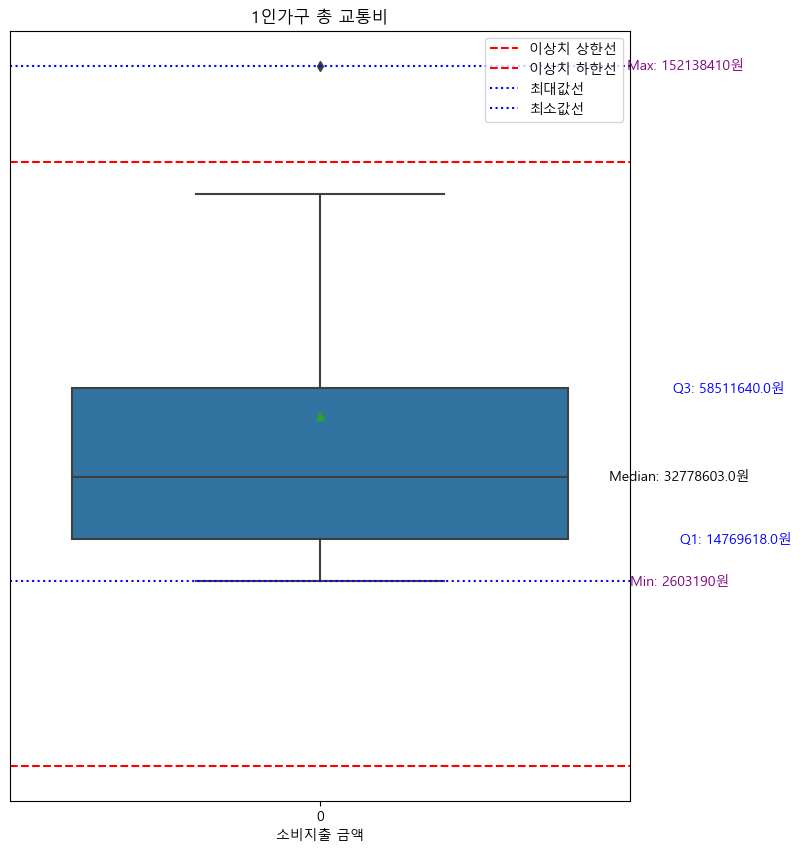

In [56]:
plt.rcParams["font.family"] = "Malgun Gothic"



fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=single_traffic_expend, showmeans=True)

Q1 = single_traffic_expend.quantile(0.25)
Q3 = single_traffic_expend.quantile(0.75)
Median = single_traffic_expend.median()   
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = single_traffic_expend.max()
min_value = single_traffic_expend.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('1인가구 총 교통비')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

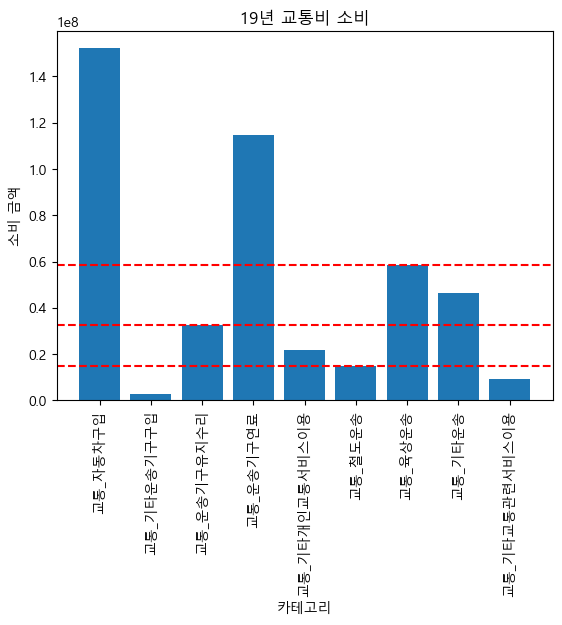

In [57]:
#그래프 그리기
import matplotlib.pyplot as plt

# total_traffic_expend = 1인가구 부분별 교통비 총합

quartile = np.percentile(single_traffic_expend, [25, 50, 75])  # 4분위수 계산


plt.rcParams['font.family'] ='Malgun Gothic'        # 한글 오류방지
plt.rcParams['axes.unicode_minus'] =False           # 한글 오류방지

plt.bar(single_traffic_expend.index, single_traffic_expend.values)  
plt.title('19년 교통비 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')



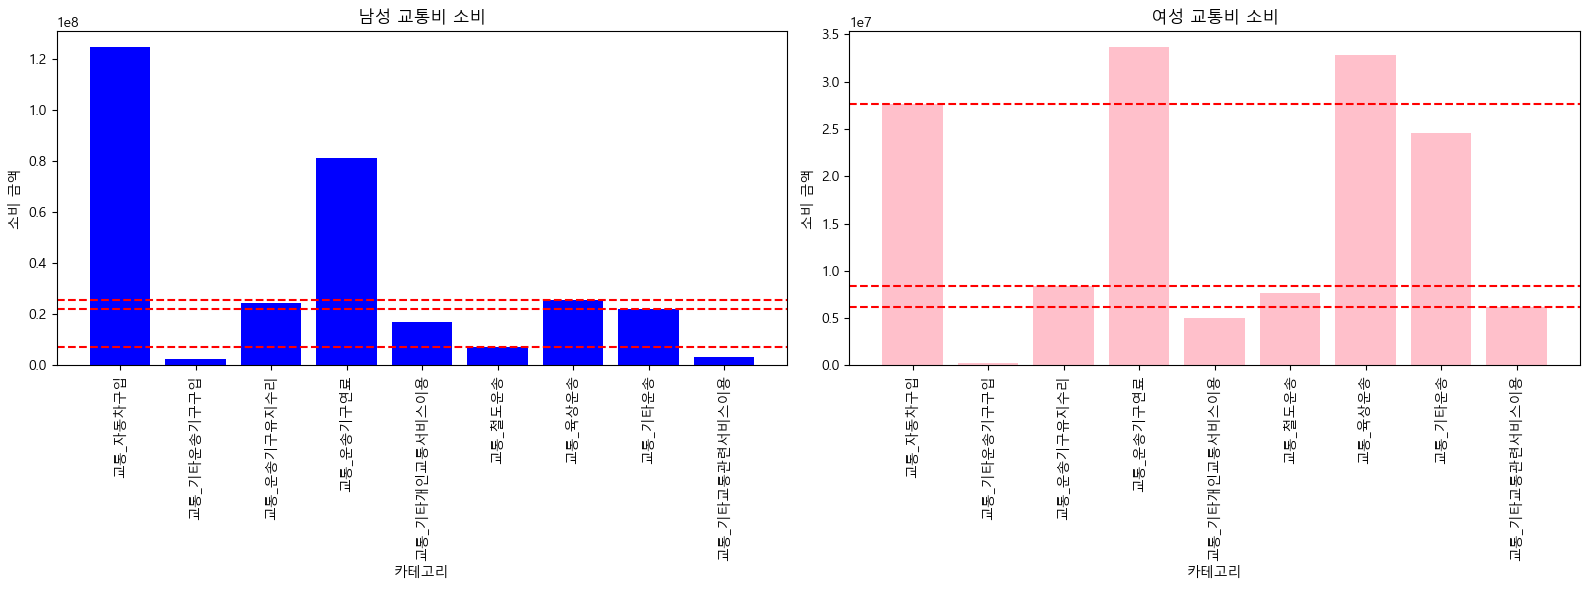

In [58]:
gender_group_single_traffic = condition_single.groupby('가구주_성별코드')        

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'pink']  # 남자는 파란색, 여자는 분홍색

for ax, (gender, data), color in zip(axes, gender_group_single_traffic, colors):
    traffic = data[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',        #교통관련 항목을 찾음
               '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']]
    traffic_sum = traffic.sum()                             # 그래프화 하기 위해 교통항목들을 다 더함
    quartile = np.percentile(traffic_sum, [25, 50, 75])  # 4분위수 계산
    ax.bar(traffic_sum.index, traffic_sum.values.T, color=color)  # 색상 설정
    ax.set_title(f'{gender} 교통비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


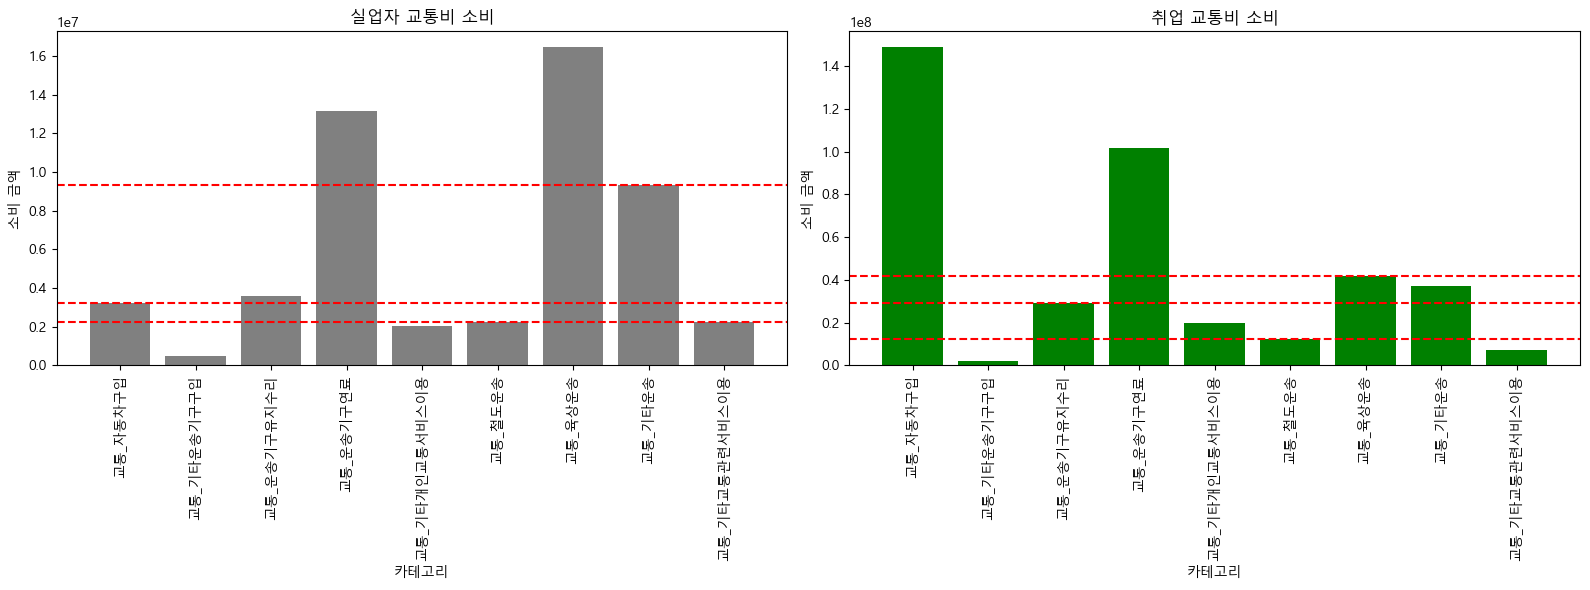

In [59]:
job_group_single = condition_single.groupby('가구주_취업여부')        #condition을 가구주 취업여부로 그룹화

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['gray', 'green']  # 취업은 회색, 비취업은 녹색

for ax, (job, data), color in zip(axes, job_group_single, colors):
    traffic = data[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',        #교통관련 항목을 찾음
               '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']]
    traffic_sum = traffic.sum()                             # 그래프화 하기 위해 교통항목들을 다 더함
    quartile = np.percentile(traffic_sum, [25, 50, 75])  # 4분위수 계산
    ax.bar(traffic_sum.index, traffic_sum.values.T, color=color)  # 색상 설정
    ax.set_title(f'{job} 교통비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


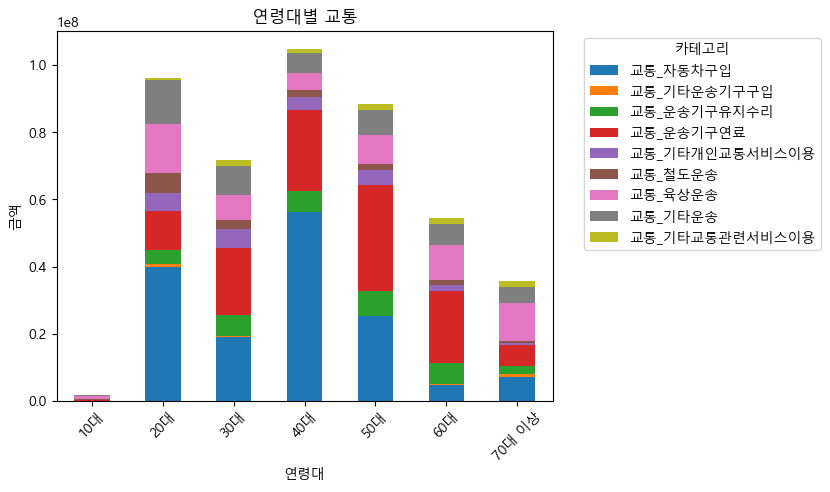

In [60]:
#연령대별로 분류

traffic_age_group = condition_single.groupby('연령대')[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']].sum()

#그래프 그리기
traffic_age_group.plot(kind='bar', stacked=True)
plt.title('연령대별 교통')
plt.xlabel('연령대')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

# 자동차구입의 수요에 따라 그에 관련된 운송기구유지수리 or 운송기구연료가 소비가 높은걸로 보입니다


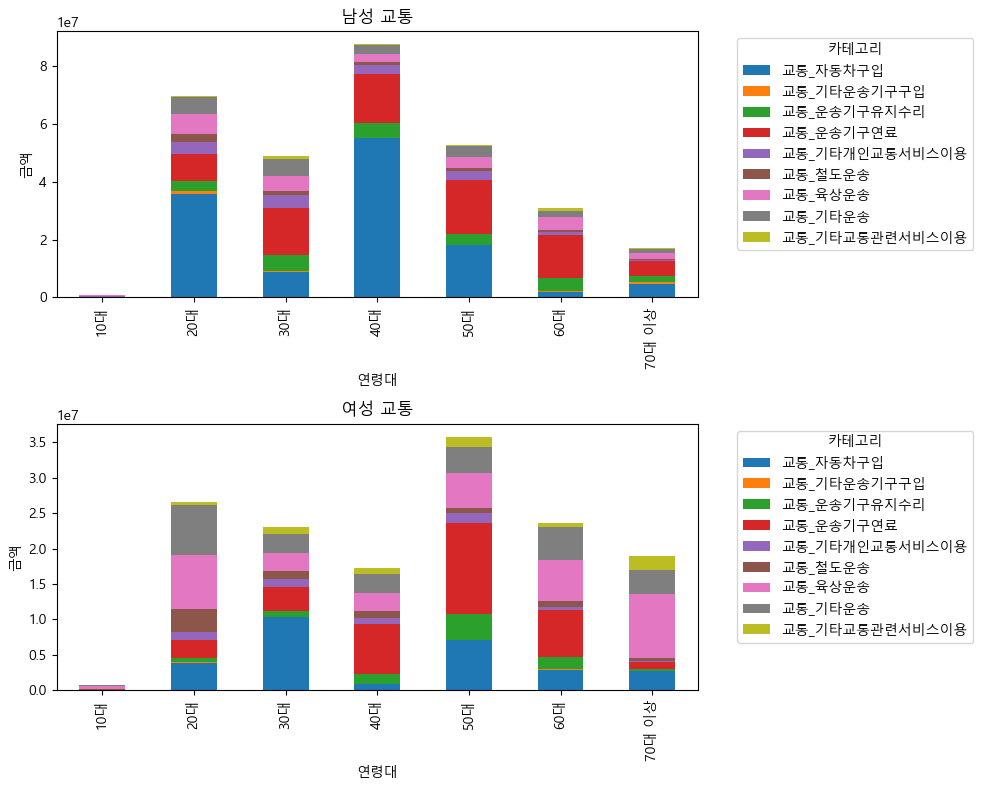

In [61]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 성별 및 연령대별로 데이터를 그룹화
traffic_age_gender_group = condition_single.groupby(['가구주_성별코드', '연령대'])[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']].sum()

# 그래프 그리기
traffic_age_gender_group.loc['남성'].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('남성 교통')
axes[0].set_xlabel('연령대')
axes[0].set_ylabel('금액')
axes[0].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

traffic_age_gender_group.loc['여성'].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('여성 교통')
axes[1].set_xlabel('연령대')
axes[1].set_ylabel('금액')
axes[1].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [62]:
# import matplotlib.pyplot as plt

# 박스플롯 생성
# plt.figure(figsize=(10, 6))  # 그림 크기 설정
# 교통.boxplot()  # 교통 데이터프레임에 대한 박스플롯 생성
#plt.xticks(rotation=45)  # x축 라벨을 45도 회전하여 표시
#plt.title('교통 박스플롯')  # 그래프 제목 설정
#plt.xlabel('카테고리')  # x축 라벨 설정
#plt.ylabel('금액')  # y축 라벨 설정
#plt.show()  # 그래프 출력

In [63]:
#plt.figure(figsize=(10, 6))  # 그림 크기 설정
#temp_df.boxplot(column='교통비')  # 교통 데이터프레임에 대한 박스플롯 생성
#plt.xticks(rotation=45)  # x축 라벨을 45도 회전하여 표시
#plt.title('교통 박스플롯')  # 그래프 제목 설정
#plt.xlabel('카테고리')  # x축 라벨 설정
#plt.ylabel('금액')  # y축 라벨 설정
#plt.show()  # 그래프 출력

통신

In [64]:
# 1인가구 통신비 총합
import pandas as pd

condition_single = temp_df[temp_df['가구원수']==1]

single_cmnct_expend= condition_single[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']].sum()

result_cmnct = pd.DataFrame(single_cmnct_expend)
result_cmnct.columns = ['총합계']
single_cmnct_expend

통신_우편서비스이용       507051
통신_통신장비구입      27209665
통신_통신서비스이용    118331975
dtype: int64

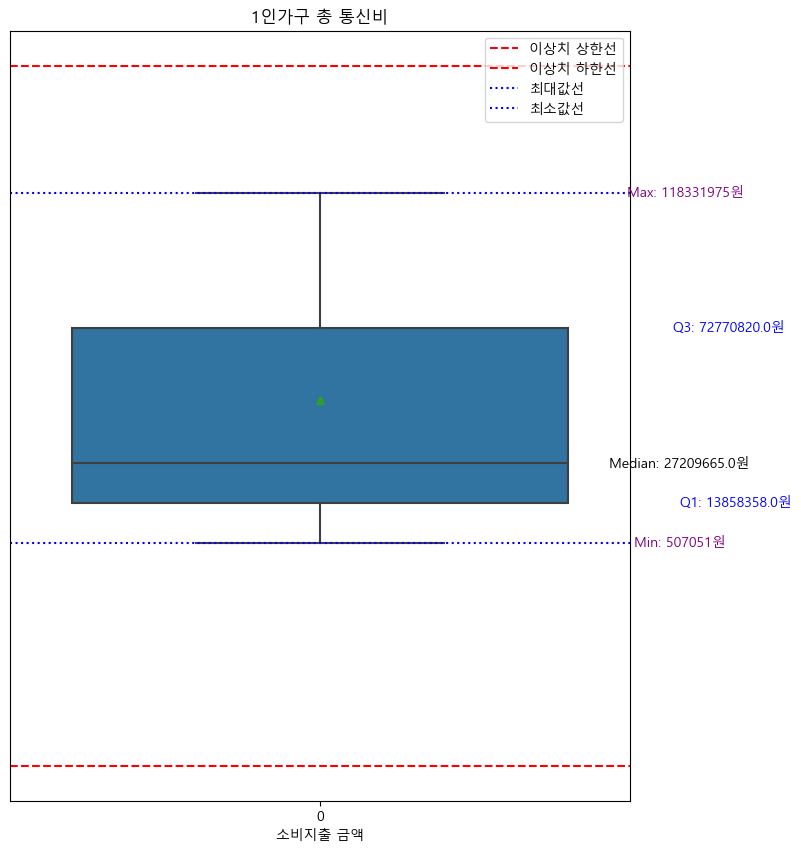

In [65]:
plt.rcParams["font.family"] = "Malgun Gothic"



fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=single_cmnct_expend, showmeans=True)

Q1 = single_cmnct_expend.quantile(0.25)
Q3 = single_cmnct_expend.quantile(0.75)
Median = single_cmnct_expend.median()   
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = single_cmnct_expend.max()
min_value = single_cmnct_expend.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('1인가구 총 통신비')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

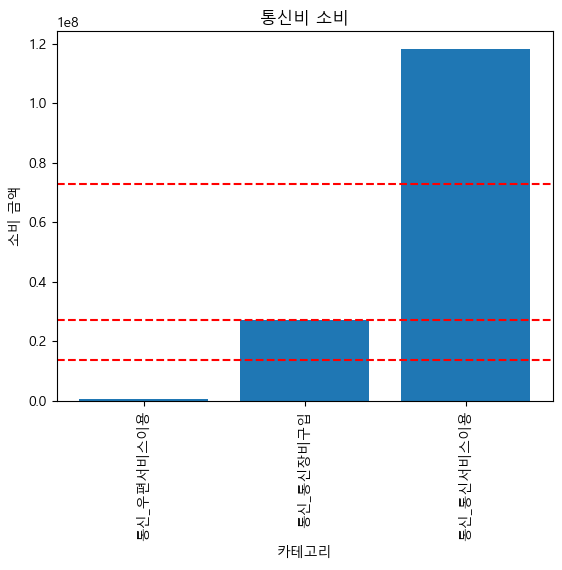

In [66]:
#그래프 그리기
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt






quartile = np.percentile(single_cmnct_expend, [25, 50, 75])  # 4분위수 계산


plt.rcParams['font.family'] ='Malgun Gothic'        # 한글 오류방지
plt.rcParams['axes.unicode_minus'] =False           # 한글 오류방지

plt.bar(single_cmnct_expend.index, single_cmnct_expend.values)
plt.title('통신비 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')



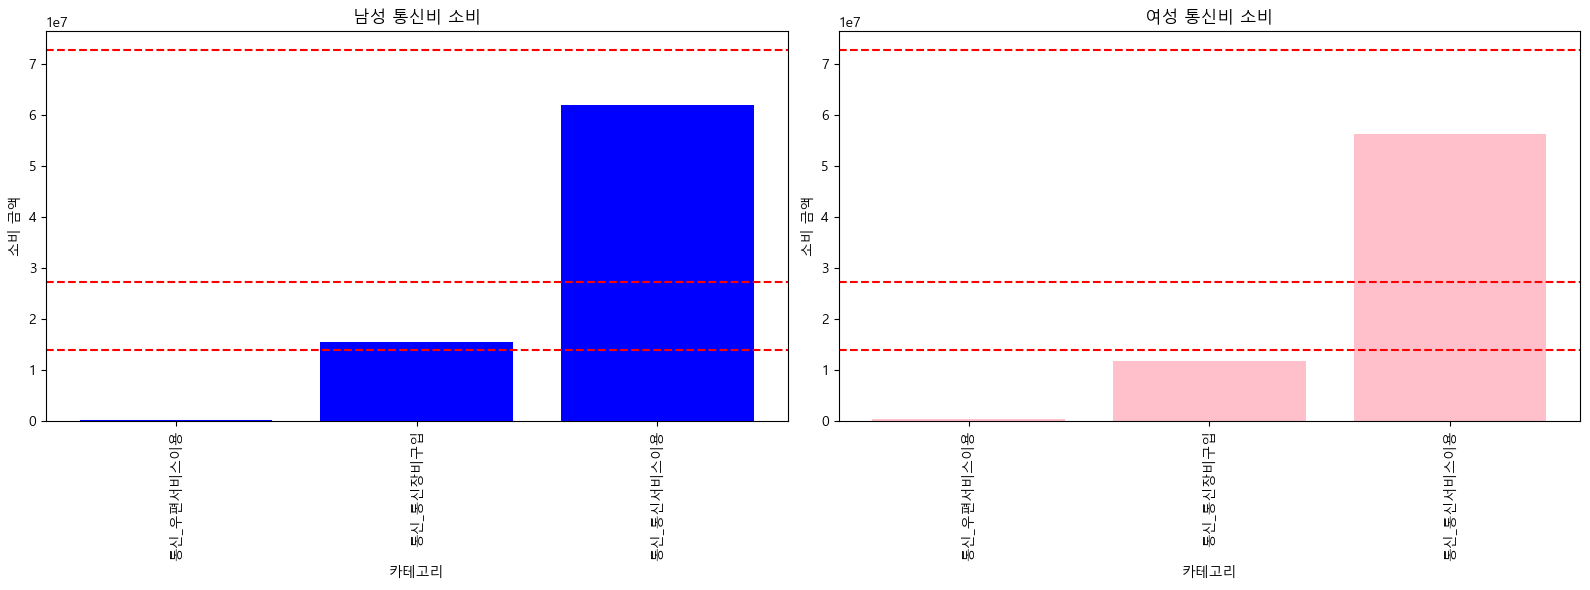

In [67]:
gender_group_single = condition_single.groupby('가구주_성별코드')        #temp_df 를 가구주_성별코드로 그룹화

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'pink']  # 남자는 파란색, 여자는 분홍색

for ax, (gender, data), color in zip(axes, gender_group_single, colors):
    cmnct= data[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']]
    cmnct_sum = cmnct.sum()
    quartile = np.percentile(single_cmnct_expend, [25, 50, 75])  # 4분위수 계산
    ax.bar(cmnct_sum.index, cmnct_sum.T.values, color=color)  # 색상 설정
    ax.set_title(f'{gender} 통신비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


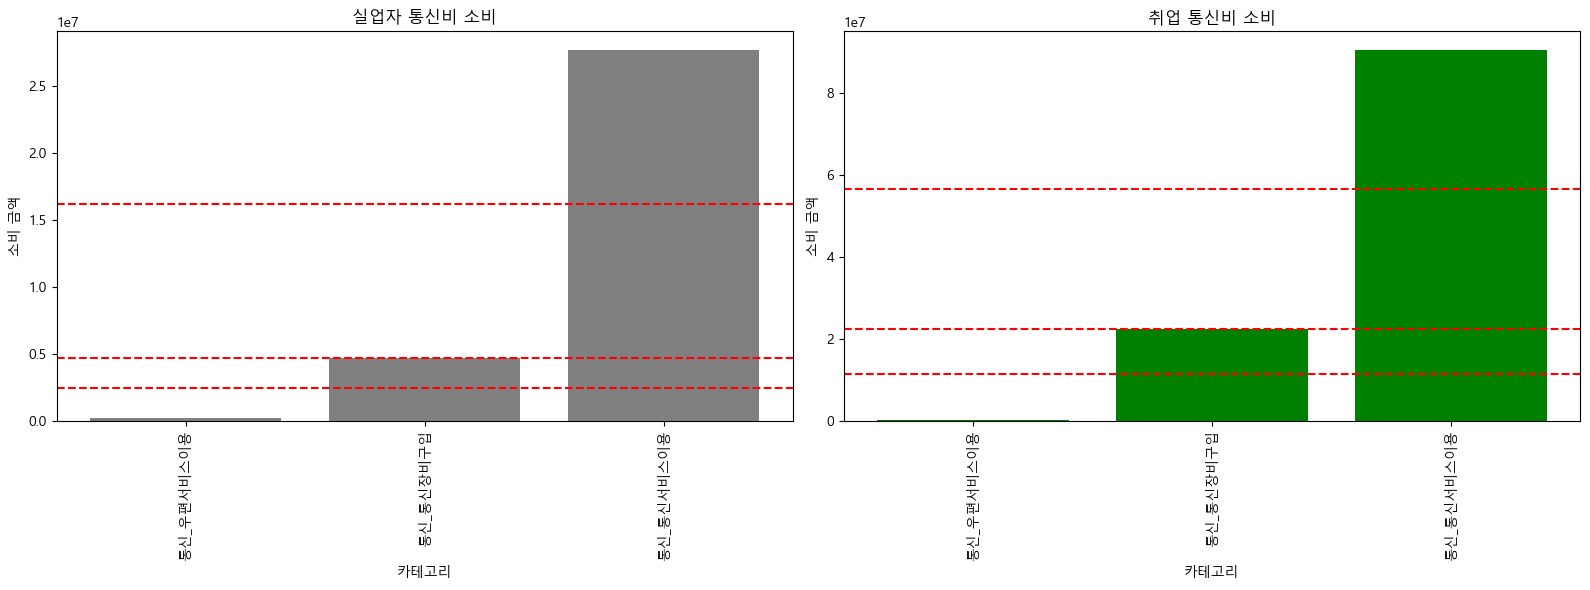

In [68]:
job_group_single = condition_single.groupby('가구주_취업여부')        #condition을 가구주 취업여부로 그룹화

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['gray', 'green']  # 취업은 회색, 비취업은 녹색

for ax, (job, data), color in zip(axes, job_group_single, colors):
    cmnct = data[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']]
    cmnct_sum = cmnct.sum()                             # 그래프화 하기 위해 교통항목들을 다 더함
    quartile = np.percentile(cmnct_sum, [25, 50, 75])  # 4분위수 계산
    ax.bar(cmnct_sum.index, cmnct_sum.values.T, color=color)  # 색상 설정
    ax.set_title(f'{job} 통신비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


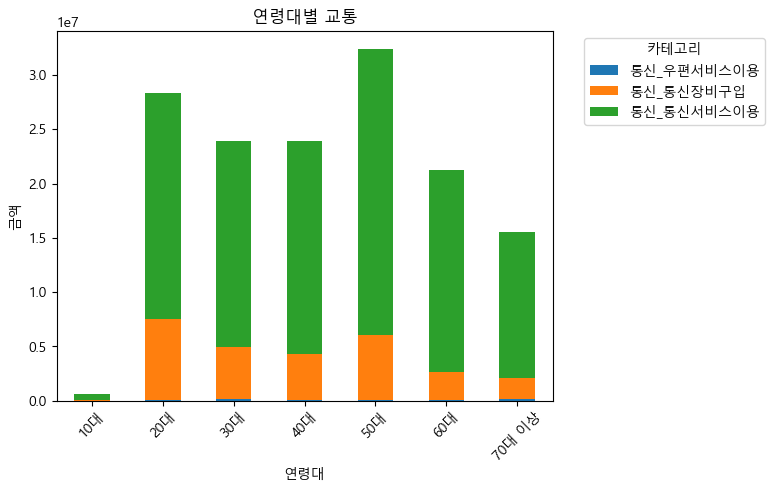

In [69]:
#연령대별로 분류

cmnct_age_group = condition_single.groupby('연령대')[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']].sum()

#그래프 그리기
cmnct_age_group.plot(kind='bar', stacked=True)
plt.title('연령대별 교통')
plt.xlabel('연령대')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

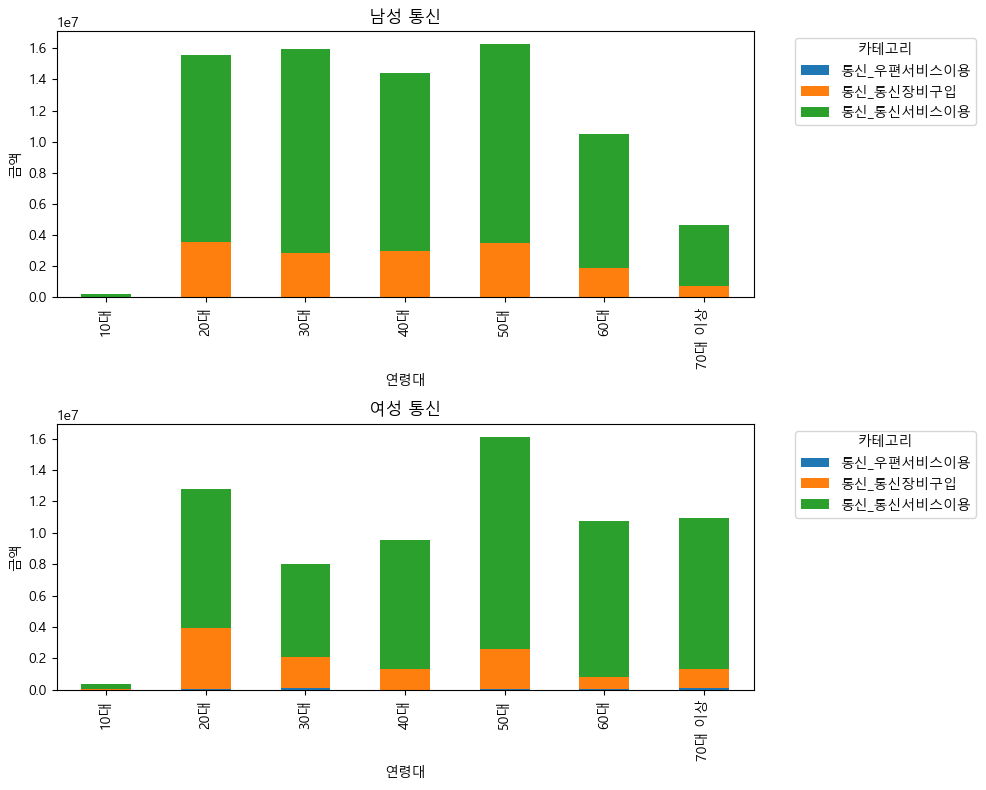

In [70]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 성별 및 연령대별로 데이터를 그룹화
cmnct_age_gender_group = condition_single.groupby(['가구주_성별코드', '연령대'])[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']].sum()


# 그래프 그리기
cmnct_age_gender_group.loc['남성'].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('남성 통신')
axes[0].set_xlabel('연령대')
axes[0].set_ylabel('금액')
axes[0].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

cmnct_age_gender_group.loc['여성'].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('여성 통신')
axes[1].set_xlabel('연령대')
axes[1].set_ylabel('금액')
axes[1].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


오락문화

In [71]:
# 1인가구 오락문화비 총합
import pandas as pd

condition_single  = temp_df[temp_df['가구원수']==1]

single_culture_expend= condition_single [['오락문화_영상음향기기구입','오락문화_사진광학장비구입','오락문화_정보처리장치구입','오락문화_기록매체구입','오락문화_영상음향정보기기수리',
              '오락문화_내구재구입','오락문화_악기기구구입','오락문화_오락문화내구재유지수리','오락문화_장난감취미용품구입','오락문화_캠핑운동관련용품구입',
              '오락문화_화훼관련용품구입','애완동물_물품구입','애완동물_서비스이용','운동오락_서비스이용','문화_서비스이용','복권_구입비','서적_구입비',
              '인쇄물_구입비','문구_구입비','단체여행_경비']].sum()

result_culture = pd.DataFrame(single_culture_expend)
result_culture.columns = ['총합계']
single_culture_expend

오락문화_영상음향기기구입       12969494
오락문화_사진광학장비구입        1111322
오락문화_정보처리장치구입       15970431
오락문화_기록매체구입           668012
오락문화_영상음향정보기기수리      1073532
오락문화_내구재구입            658883
오락문화_악기기구구입          1199129
오락문화_오락문화내구재유지수리      637285
오락문화_장난감취미용품구입       4447649
오락문화_캠핑운동관련용품구입      7705972
오락문화_화훼관련용품구입        6092552
애완동물_물품구입           11020834
애완동물_서비스이용           5753614
운동오락_서비스이용          32997387
문화_서비스이용            59347155
복권_구입비               1736206
서적_구입비               7224225
인쇄물_구입비              1358993
문구_구입비               2772334
단체여행_경비             61740211
dtype: int64

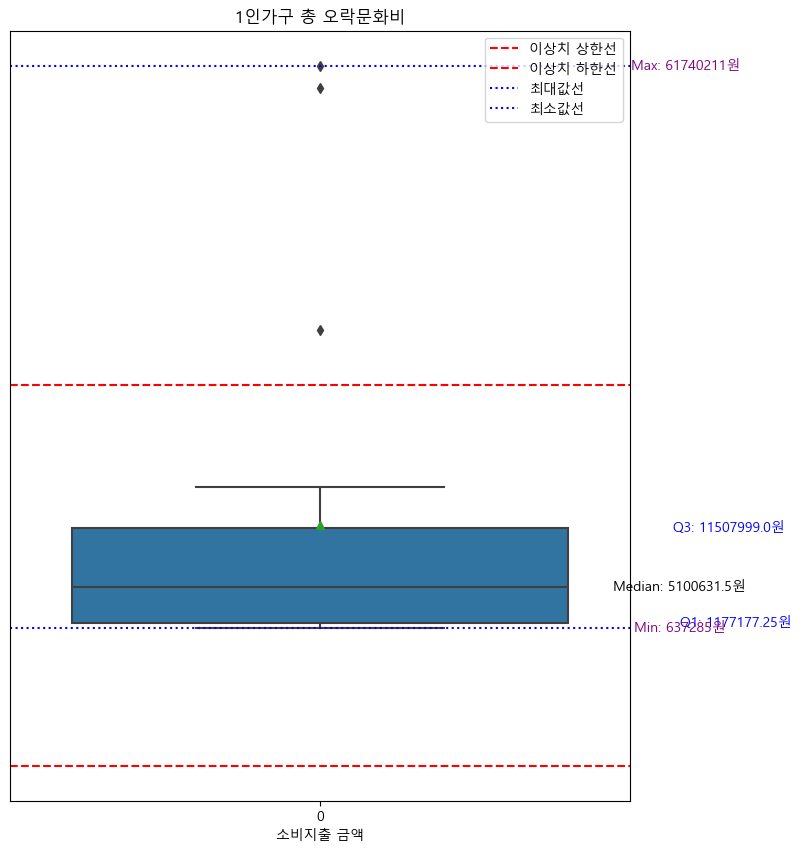

In [72]:
plt.rcParams["font.family"] = "Malgun Gothic"



fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=single_culture_expend, showmeans=True)

Q1 = single_culture_expend.quantile(0.25)
Q3 = single_culture_expend.quantile(0.75)
Median = single_culture_expend.median()   
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = single_culture_expend.max()
min_value = single_culture_expend.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('1인가구 총 오락문화비')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

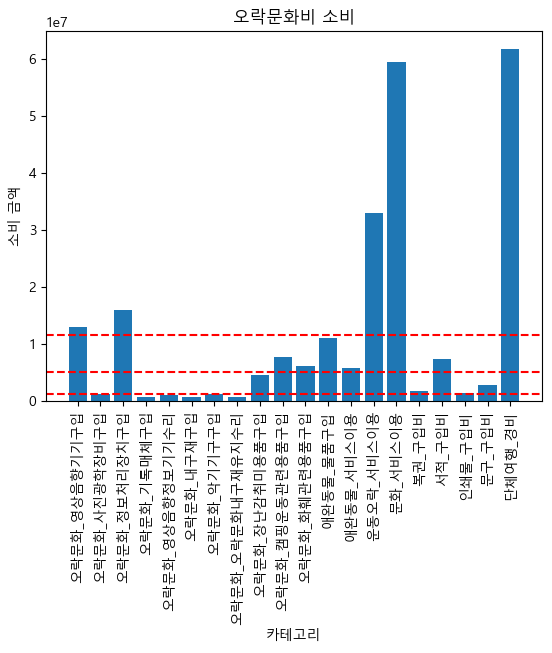

In [73]:
#그래프 그리기
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt







quartile = np.percentile(single_culture_expend, [25, 50, 75])  # 4분위수 계산


plt.rcParams['font.family'] ='Malgun Gothic'        # 한글 오류방지
plt.rcParams['axes.unicode_minus'] =False           # 한글 오류방지

plt.bar(single_culture_expend.index, single_culture_expend.values)
plt.title('오락문화비 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')



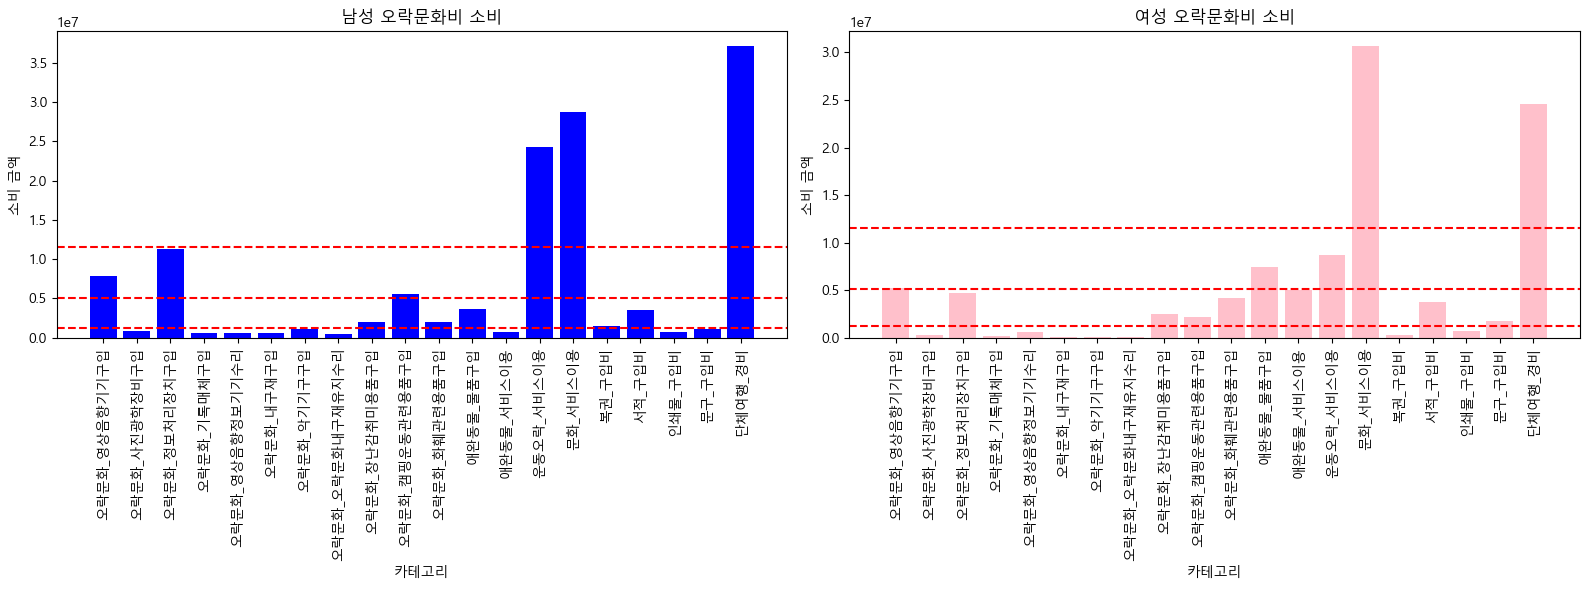

In [74]:
gender_group_single = condition_single.groupby('가구주_성별코드')        #temp_df 를 가구주_성별코드로 그룹화

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'pink']  # 남자는 파란색, 여자는 분홍색

for ax, (gender, data), color in zip(axes, gender_group_single, colors):
    culture= data[['오락문화_영상음향기기구입','오락문화_사진광학장비구입','오락문화_정보처리장치구입','오락문화_기록매체구입','오락문화_영상음향정보기기수리',
              '오락문화_내구재구입','오락문화_악기기구구입','오락문화_오락문화내구재유지수리','오락문화_장난감취미용품구입','오락문화_캠핑운동관련용품구입',
              '오락문화_화훼관련용품구입','애완동물_물품구입','애완동물_서비스이용','운동오락_서비스이용','문화_서비스이용','복권_구입비','서적_구입비',
              '인쇄물_구입비','문구_구입비','단체여행_경비']]
    culture_sum = culture.sum()
    quartile = np.percentile(single_culture_expend, [25, 50, 75])  # 4분위수 계산
    ax.bar(culture_sum.index, culture_sum.T.values, color=color)  # 색상 설정
    ax.set_title(f'{gender} 오락문화비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


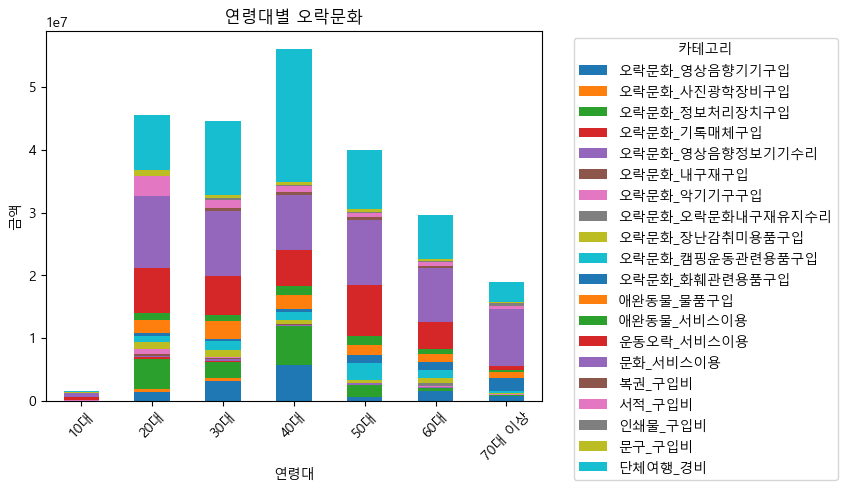

In [75]:
#연령대별로 분류

culture_age_group = condition_single.groupby('연령대')[['오락문화_영상음향기기구입','오락문화_사진광학장비구입','오락문화_정보처리장치구입','오락문화_기록매체구입','오락문화_영상음향정보기기수리',
                '오락문화_내구재구입','오락문화_악기기구구입','오락문화_오락문화내구재유지수리','오락문화_장난감취미용품구입','오락문화_캠핑운동관련용품구입',
                '오락문화_화훼관련용품구입','애완동물_물품구입','애완동물_서비스이용','운동오락_서비스이용','문화_서비스이용','복권_구입비','서적_구입비',
                '인쇄물_구입비','문구_구입비','단체여행_경비']].sum()

#그래프 그리기
culture_age_group.plot(kind='bar', stacked=True)
plt.title('연령대별 오락문화')
plt.xlabel('연령대')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

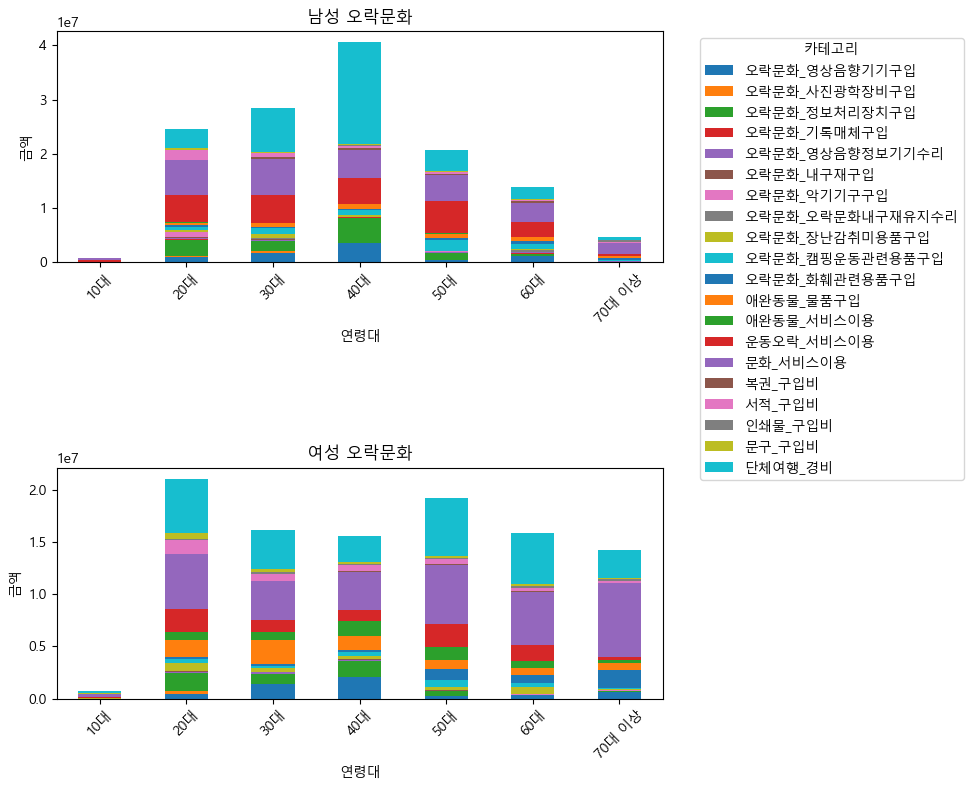

In [76]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 성별 및 연령대별로 데이터를 그룹화
culture_age_gender_group = condition_single.groupby(['가구주_성별코드','연령대'])[['오락문화_영상음향기기구입','오락문화_사진광학장비구입','오락문화_정보처리장치구입','오락문화_기록매체구입','오락문화_영상음향정보기기수리',
              '오락문화_내구재구입','오락문화_악기기구구입','오락문화_오락문화내구재유지수리','오락문화_장난감취미용품구입','오락문화_캠핑운동관련용품구입',
              '오락문화_화훼관련용품구입','애완동물_물품구입','애완동물_서비스이용','운동오락_서비스이용','문화_서비스이용','복권_구입비','서적_구입비',
              '인쇄물_구입비','문구_구입비','단체여행_경비']].sum()


# 그래프 그리기
culture_age_gender_group.loc['남성'].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('남성 오락문화')
axes[0].set_xlabel('연령대')
axes[0].set_ylabel('금액')
axes[0].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)  # x 라벨 회전



culture_age_gender_group.loc['여성'].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('여성 오락문화')
axes[1].set_xlabel('연령대')
axes[1].set_ylabel('금액')
axes[1].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].legend().remove()  # 범례 삭제
axes[1].tick_params(axis='x', rotation=45)  # x 라벨 회전


plt.tight_layout()
plt.show()

In [77]:
'''
# 교통비 비율

total_traffic = temp_df['교통비']
total_traffic_mean = total_traffic.mean()
tatal_traffic_per = (total_traffic_mean / total_expend_mean) *100

print(f"전체가구 소비 중 교통비 비율: {total_traffic_mean:,}원 ({tatal_traffic_per:.2f}%)")
'''

'\n# 교통비 비율\n\ntotal_traffic = temp_df[\'교통비\']\ntotal_traffic_mean = total_traffic.mean()\ntatal_traffic_per = (total_traffic_mean / total_expend_mean) *100\n\nprint(f"전체가구 소비 중 교통비 비율: {total_traffic_mean:,}원 ({tatal_traffic_per:.2f}%)")\n'

2020년

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('1인가구자료조사/2020년자료.csv',encoding='cp949')




In [79]:
temp_df =df.copy()
temp_df

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,...,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드
0,202000,1,1,1,1,0,0,0,1,1,...,14517,95073,20875,0,33000,34532,0,1667,5000,1
1,202000,2,2,2,0,1,0,0,0,1,...,0,87325,53992,0,0,0,0,33333,0,1
2,202000,3,1,4,2,0,0,0,1,2,...,0,234295,66345,0,40385,60898,0,50000,16667,1
3,202000,4,1,3,3,0,0,1,0,2,...,5167,1868423,63215,0,217125,225328,829422,430000,103333,1
4,202000,5,2,3,3,0,0,0,1,2,...,3317,465232,22685,0,0,119172,290042,33333,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12117,202000,12118,1,2,2,0,0,1,0,1,...,0,4176270,555360,16000,560550,343360,0,1725000,976000,0
12118,202000,12119,2,2,2,0,0,1,0,1,...,0,1230790,225075,19110,64235,282370,0,440000,200000,0
12119,202000,12120,2,5,4,0,0,1,0,2,...,25000,1335260,207780,0,193450,101430,29600,650000,153000,0
12120,202000,12121,1,3,2,0,0,1,0,2,...,0,1417340,80250,0,268420,161870,36800,500000,370000,0


In [80]:
# 변수정리  

temp_df.rename(columns={
    '가계지출금액': '전체소비지출',
    '가계지출_소비지출금액': '소비지출',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품음료구입',
    '가계지출_소비지출_식료품비주류음료_곡물구입비': '식료품_곡물구입',
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비': '식료품_곡물가공품구입',
    '가계지출_소비지출_식료품비주류음료_빵떡류구입비': '식료품_빵떡류구입',
    '가계지출_소비지출_식료품비주류음료_육류구입비': '식료품_육류구입',
    '가계지출_소비지출_식료품비주류음료_육류가공품구입비': '식료품_육류가공품구입',
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비': '식료품_신선수산동물구입',
    '가계지출_소비지출_식료품비주류음료_염건수산동물구입비': '식료품_염건수산동물구입',
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비': '식료품_기타수산동물가공구입',
    '가계지출_소비지출_식료품비주류음료_유제품및알구입비': '식료품_유제품알구입',
    '가계지출_소비지출_식료품비주류음료_유지류구입비': '식료품_유지류구입',
    '가계지출_소비지출_식료품비주류음료_과일가공품구입비': '식료품_과일가공품구입',
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비': '식료품_채소가공품구입',
    '가계지출_소비지출_식료품비주류음료_해조가공품구입비': '식료품_해조가공품구입',
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비': '식료품_당류과자류구입',
    '가계지출_소비지출_식료품비주류음료_조미식품구입비': '식료품_조미식품구입',
    '가계지출_소비지출_식료품비주류음료_기타식품구입비': '식료품_기타식품구입',
    '가계지출_소비지출_식료품비주류음료_커피차구입비': '식료품_커피차구입',
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비': '식료품_쥬스음료구입',
    '가계지출_소비지출_주류담배구입비': '주류담배구입',
    '가계지출_소비지출_주류담배_주류구입비': '주류구입',
    '가계지출_소비지출_주류담배_담배구입비': '담배구입',
    '가계지출_소비지출_의류신발구입비': '의류신발구입',
    '가계지출_소비지출_의류신발_직물및외의구입비': '의류신발_직물및외의구입',
    '가계지출_소비지출_의류신발_내의구입비': '의류신발_내의구입',
    '가계지출_소비지출_의류신발_기타의복구입비': '의류신발_기타의복구입',
    '가계지출_소비지출_의류신발_의복관련서비스구입비': '의류신발_의복관련서비스구입',
    '가계지출_소비지출_의류신발_신발구입비': '의류신발_신발구입',
    '가계지출_소비지출_의류신발_신발서비스구입비': '의류신발_신발서비스구입',
    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_주거수도광열_실제주거비구입비': '주거수도광열_실제주거비구입',
    '가계지출_소비지출_주거수도광열_주택유지수선구입비': '주거수도광열_주택유지수선구입',
    '가계지출_소비지출_주거수도광열_상하수도폐기물처리비': '주거수도광열_상하수도폐기물처리',
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비': '주거수도광열_기타주거관련서비스구입',
    '가계지출_소비지출_주거수도광열_연료비구입비': '주거수도광열_연료비구입',
    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가구조명구입비': '가정용품가사서비스_가구조명구입',
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비': '가정용품가사서비스_실내장식구입',
    '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액': '가정용품가사서비스_가구조명장식서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비': '가정용품가사서비스_가정용섬유구입',
    '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비': '가정용품가사서비스_가전가정용기기구입',
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액': '가정용품가사서비스_가전관련서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가사용품구입비': '가정용품가사서비스_가사용품구입',
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비': '가정용품가사서비스_가정용공구기타구입',
    '가계지출_소비지출_가정용품가사서비스_가사소모품구입비': '가정용품가사서비스_가사소모품구입',
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액': '가정용품가사서비스_가사서비스',
    '가계지출_소비지출_보건제품구입비': '보건제품구입',
    '가계지출_소비지출_보건_의약품구입비': '보건_의약품구입',
    '가계지출_소비지출_보건_의료용소모품구입비': '보건_의료용소모품구입',
    '가계지출_소비지출_보건_보건의료용품기구구입비': '보건_보건의료용품기구구입',
    '가계지출_소비지출_보건_외래의료서비스이용금액': '보건_외래의료서비스이용',
    '가계지출_소비지출_보건_치과서비스이용금액': '보건_치과서비스이용',
    '가계지출_소비지출_보건_기타의료서비스이용금액': '보건_기타의료서비스이용',
    '가계지출_소비지출_보건_입원서비스이용금액': '보건_입원서비스이용',
    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_교통_자동차구입비': '교통_자동차구입',
    '가계지출_소비지출_교통_기타운송기구구입비': '교통_기타운송기구구입',
    '가계지출_소비지출_교통_운송기구유지수리비': '교통_운송기구유지수리',
    '가계지출_소비지출_교통_운송기구연료비': '교통_운송기구연료',
    '가계지출_소비지출_교통_기타개인교통서비스이용금액': '교통_기타개인교통서비스이용',
    '가계지출_소비지출_교통_철도운송금액': '교통_철도운송',
    '가계지출_소비지출_교통_육상운송금액': '교통_육상운송',
    '가계지출_소비지출_교통_기타운송금액': '교통_기타운송',
    '가계지출_소비지출_교통_기타교통관련서비스이용금액': '교통_기타교통관련서비스이용',
    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_통신_우편서비스이용금액': '통신_우편서비스이용',
    '가계지출_소비지출_통신_통신장비구입비': '통신_통신장비구입',
    '가계지출_소비지출_통신_통신서비스이용금액': '통신_통신서비스이용',
    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_오락문화_영상음향기기구입비': '오락문화_영상음향기기구입',
    '가계지출_소비지출_오락문화_사진광학장비구입비': '오락문화_사진광학장비구입',
    '가계지출_소비지출_오락문화_정보처리장치구입비': '오락문화_정보처리장치구입',
    '가계지출_소비지출_오락문화_기록매체구입비': '오락문화_기록매체구입',
    '가계지출_소비지출_오락문화_영상음향정보기기수리비': '오락문화_영상음향정보기기수리',
    '가계지출_소비지출_오락문화_내구재구입비': '오락문화_내구재구입',
    '가계지출_소비지출_오락문화_악기기구구입비': '오락문화_악기기구구입',
    '가계지출_소비지출_오락문화_오락문화내구재유지수리비': '오락문화_오락문화내구재유지수리',
    '가계지출_소비지출_오락문화_장난감취미용품구입비': '오락문화_장난감취미용품구입',
    '가계지출_소비지출_오락문화_캠핑운동관련용품구입비': '오락문화_캠핑운동관련용품구입',
    '가계지출_소비지출_오락문화_화훼관련용품구입비': '오락문화_화훼관련용품구입',
    '가계지출_소비지출_오락문화_가족소비관광서비스이용금액': '오락문화_가족소비관광서비스이용',
    '가계지출_소비지출_오락문화_기타오락문화서비스이용금액': '오락문화_기타오락문화서비스이용',
    '가계지출_소비지출_오락문화_영화공연관람비': '오락문화_영화공연관람',
    '가계지출_소비지출_오락문화_음반영상물구입비': '오락문화_음반영상물구입',
    '가계지출_소비지출_오락문화_여행운동관련서비스이용금액': '오락문화_여행운동관련서비스이용',
    '가계지출_소비지출_오락문화_숙박관련서비스이용금액': '오락문화_숙박관련서비스이용',
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_교육_교육비상품서비스이용금액': '교육_교육비상품서비스이용',
    '가계지출_소비지출_교육_교과서비스구입비': '교육_교과서비스구입',
    '가계지출_소비지출_교육_기타교육비상품서비스이용금액': '교육_기타교육비상품서비스이용',
    '가계지출_소비지출_교육_교과서비스외서구입비': '교육_교과서비스외서구입',
    '가계지출_소비지출_교육_외국어서적구입비': '교육_외국어서적구입',
    '가계지출_소비지출_교육_기타서적구입비': '교육_기타서적구입',
    '가계지출_소비지출_교육_전자교과서비스이용금액': '교육_전자교과서비스이용',
    '가계지출_소비지출_교육_기타교육서비스이용금액': '교육_기타교육서비스이용',
    '가계지출_소비지출_교육_직업훈련서비스이용금액': '교육_직업훈련서비스이용',
    '가계지출_소비지출_교육_취미서비스이용금액': '교육_취미서비스이용',
    '가계지출_소비지출_교육_미술학원서비스이용금액': '교육_미술학원서비스이용',
    '가계지출_소비지출_교육_음악학원서비스이용금액': '교육_음악학원서비스이용',
    '가계지출_소비지출_교육_기타교육학원서비스이용금액': '교육_기타교육학원서비스이용',
    '가계지출_소비지출_교육_기타교육관련서비스이용금액': '교육_기타교육관련서비스이용',
    '가계지출_소비지출_음식외식비': '음식외식비',
    '가계지출_소비지출_음식외식_외식음식비': '외식음식비',
    '가계지출_소비지출_음식외식_휴게음식비': '휴게음식비',
    '가계지출_소비지출_음식외식_음식재료비': '음식재료비',
    '가계지출_소비지출_음식외식_간식비': '간식비',
    '가계지출_소비지출_음식외식_식음료조제서비스이용금액': '식음료조제서비스이용',
    '가계지출_소비지출_음식외식_식음료종합소매업이용금액': '식음료종합소매업이용',
    '가계지출_소비지출_음식외식_농수산물구입비': '농수산물구입',
    '가계지출_소비지출_음식외식_식음료종합소매업이용비': '식음료종합소매업이용',
    '가계지출_소비지출_기타상품서비스이용금액': '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비': '기타서비스금액구입',
    '가계지출_비소비지출금액': '비소비지출금액',
    '가계지출_비소비지출_경상조세': '비경상조세',
    '가계지출_비소비지출_비경상조세': '비경상조세',
    '가계지출_비소비지출_연금기여금': '연금기여금'
}, inplace=True)

temp_df.rename(columns={
    '가계지출_소비지출_오락문화_애완동물관련물품구입비': '애완동물_물품구입',
    '가계지출_소비지출_오락문화_화훼애완동물서비스이용금액': '애완동물_서비스이용',
    '가계지출_소비지출_오락문화_운동오락서비스이용금액': '운동오락_서비스이용',
    '가계지출_소비지출_오락문화_문화서비스이용금액': '문화_서비스이용',
    '가계지출_소비지출_오락문화_복권구입비': '복권_구입비',
    '가계지출_소비지출_오락문화_서적구입비': '서적_구입비',
    '가계지출_소비지출_오락문화_기타인쇄물구입비': '인쇄물_구입비',
    '가계지출_소비지출_오락문화_문구구입비': '문구_구입비',
    '가계지출_소비지출_오락문화_단체여행경비': '단체여행_경비',
    '교육비': '교육비',
    '가계지출_소비지출_교육_정규교육비': '정규교육비',
    '가계지출_소비지출_교육_초등교육비': '초등교육비',
    '가계지출_소비지출_교육_중등교육비': '중등교육비',
    '가계지출_소비지출_교육_고등교육비': '고등교육비',
    '가계지출_소비지출_교육_학원보습교육비': '학원보습교육비',
    '가계지출_소비지출_교육_학생학원교육비': '학생학원교육비',
    '가계지출_소비지출_교육_성인학원비': '성인학원비',
    '가계지출_소비지출_교육_기타교육비': '기타교육비',
    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_음식숙박_식대': '식대',
    '가계지출_소비지출_음식숙박_숙박비': '숙박비',
    '기타상품서비스이용': '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액': '이미용서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용기기구입비': '이미용기기구입',
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비': '위생이미용용품구입',
    '가계지출_소비지출_기타상품서비스_시계장신구구입비': '시계장신구구입',
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비': '기타개인용품구입',
    '가계지출_소비지출_기타상품서비스_복지시설비용금액': '복지시설비용',
    '가계지출_소비지출_기타상품서비스_보험료': '보험료',
    '가계지출_소비지출_기타상품서비스_기타금융구입비': '기타금융구입',
    '기타서비스금액구입': '기타서비스금액구입',
    '비소비지출금액': '비소비지출금액',
    '비경상조세': '비경상조세',
    '연금기여금': '연금기여금',
    '가계지출_비소비지출_사회보장구입비': '사회보장구입비',
    '가계지출_비소비지출_이자비용': '이자비용',
    '가계지출_비소비지출_가구간이전지출금액': '가구간이전지출금액',
    '가계지출_비소비지출_비영리단체이전지출금액': '비영리단체이전지출금액'
}, inplace=True)

In [81]:
# 행 전처리

temp_df = temp_df[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드', '자동차보유대수',
           '입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입', '비소비지출금액',
           '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용', '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드']]


In [82]:
temp_df['가구구분코드'] = temp_df['가구구분코드'].replace({1:'근로자 가구',2:'비근로자 가구'})
temp_df['노인가구여부'] = temp_df['노인가구여부'].replace({0:'아니요',1:'예'})
temp_df['배우자코드'] = temp_df['배우자코드'].replace({1:'현재(동거)',2:'비근로자 가구',3:'부재'})
temp_df['가구주_성별코드'] = temp_df['가구주_성별코드'].replace({1:'남성',2:'여성'})
temp_df['가구주_취업여부'] = temp_df['가구주_취업여부'].replace({1:'취업',2:'실업자'})
temp_df['거처구분코드'] = temp_df['거처구분코드'].replace({1: '단독주택(다세대 포함)', 2: '아파트', 3: '연립주택', 4: '다가구주택', 5: '비주거용 건물', 6: '오피스텔', 7: '기타'})
temp_df['입주형태코드'] = temp_df['입주형태코드'].replace({1: '내 집', 2: '무료주택', 3: '회사주택', 4: '임대', 5: '영구임대', 6: '보증금 월세', 7: '보증금 없는 월세'})
temp_df['소득구간코드'] = temp_df['소득구간코드'].replace({1: '100만원 미만', 2: '100~200만원', 3: '200~300만원', 4: '300~400만원', 5: '400~500만원', 6: '500~600만원', 7: '600~700만원', 8: '700만원 이상'})
temp_df['도시읍면부구분코드'] = temp_df['도시읍면부구분코드'].replace({0:'비도시', 1:'도시'})


In [83]:
def age(가구주_연령):
    if 가구주_연령 < 20:
        return '10대'
    elif 20 <= 가구주_연령 < 30:
        return '20대'
    elif 30 <= 가구주_연령 < 40:
        return '30대'
    elif 40 <= 가구주_연령 < 50:
        return '40대'
    elif 50 <= 가구주_연령 < 60:
        return '50대'
    elif 60 <= 가구주_연령 < 70:
        return '60대'
    else:
        return '70대 이상'

# 데이터 연령대별 구분
temp_df.loc[:, '연령대'] = temp_df['가구주_연령'].apply(age)
temp_df.head()

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,가구주_취업여부,...,비경상조세,비경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드,연령대
0,202000,1,근로자 가구,1,1,아니요,부재,남성,31,취업,...,0,20875,0,33000,34532,0,1667,5000,도시,30대
1,202000,2,비근로자 가구,2,0,예,현재(동거),남성,74,실업자,...,0,53992,0,0,0,0,33333,0,도시,70대 이상
2,202000,3,근로자 가구,4,2,아니요,비근로자 가구,여성,48,취업,...,0,66345,0,40385,60898,0,50000,16667,도시,40대
3,202000,4,근로자 가구,3,3,아니요,현재(동거),남성,51,취업,...,0,63215,0,217125,225328,829422,430000,103333,도시,50대
4,202000,5,비근로자 가구,3,3,아니요,부재,여성,56,취업,...,0,22685,0,0,119172,290042,33333,0,도시,50대


전처리

In [84]:
total_expend = temp_df['소비지출']
total_expend.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12122 entries, 0 to 12121
Series name: 소비지출
Non-Null Count  Dtype
--------------  -----
12122 non-null  int64
dtypes: int64(1)
memory usage: 94.8 KB


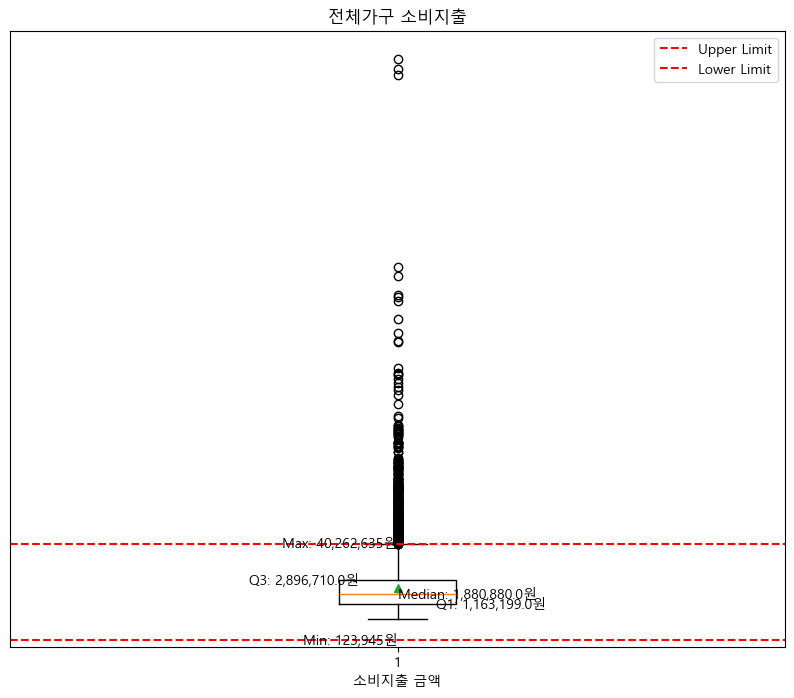

In [85]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(total_expend, 25)
Q3 = np.percentile(total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left')  # 오른쪽에 출력
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, np.median(total_expend), f'Median: {np.median(total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')  # 왼쪽에 출력
plt.text(1, lower_limit, f'Min: {np.min(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력
plt.text(1, upper_limit, f'Max: {np.max(total_expend):,}원', verticalalignment='center', horizontalalignment='right')  # 왼쪽에 출력

plt.title('전체가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

전체가구 이상치 제거 후 모습

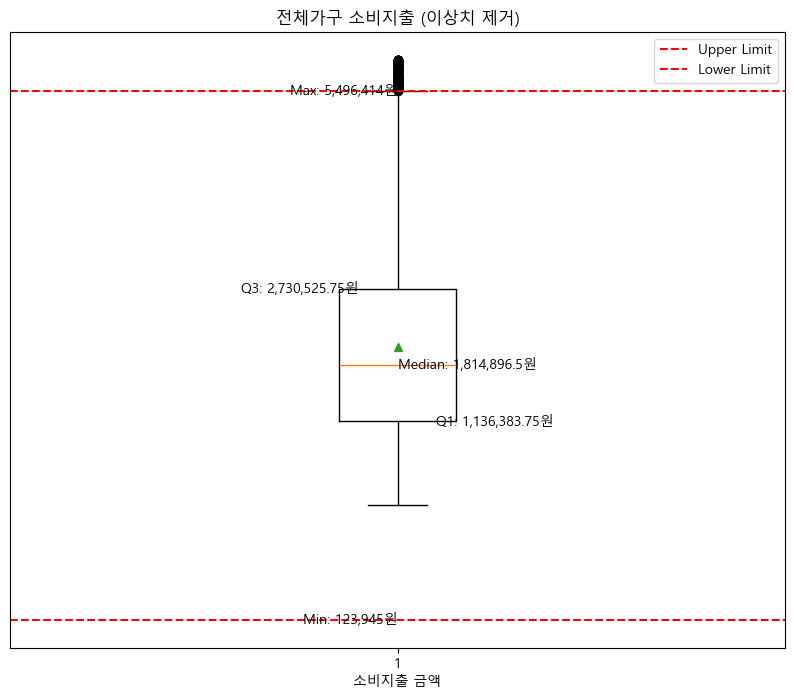

In [86]:
# 이상치 제거

# 이상치 제거
cleaned_total_expend = total_expend[(total_expend >= lower_limit) & (total_expend <= upper_limit)]

plt.figure(figsize=(10, 8))  # 그림 크기 조정

plt.boxplot(cleaned_total_expend, showmeans=True)

# 이상치 기준 라인을 그립니다.
Q1 = np.percentile(cleaned_total_expend, 25)
Q3 = np.percentile(cleaned_total_expend, 75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

plt.axhline(y=upper_limit, color='r', linestyle='--', label='Upper Limit')
plt.axhline(y=lower_limit, color='r', linestyle='--', label='Lower Limit')

# 특정 값 출력
plt.text(1.05, Q1, f'Q1: {Q1:,}원', verticalalignment='center', horizontalalignment='left') 
plt.text(0.95, Q3, f'Q3: {Q3:,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, np.median(cleaned_total_expend), f'Median: {np.median(cleaned_total_expend):,}원', color='black', verticalalignment='center', horizontalalignment='left')
plt.text(1, lower_limit, f'Min: {np.min(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right') 
plt.text(1, upper_limit, f'Max: {np.max(cleaned_total_expend):,}원', verticalalignment='center', horizontalalignment='right')  

plt.title('전체가구 소비지출 (이상치 제거)')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()


In [92]:
#이상치 제거 전 인원 수
print(len(total_expend))
print()
# 이상치 제거 후 인원 수
print(len(cleaned_total_expend))
# 이상치 갯수
print(len(total_expend) - len(cleaned_total_expend))

12122

11622
500


In [94]:
#전체가구 평균 소비지출
total_expend_mean = int(total_expend.mean())
print(total_expend_mean)

2294703


In [95]:
# 1인가구 소비지출 추출
single_expend= temp_df.loc[temp_df['가구원수']==1,'소비지출']
single_expend_mean = single_expend.mean()
print(single_expend)

print(single_expend_mean)

0        1673542
7        1211227
11       1297083
16       2282052
17       1740520
          ...   
12103     402238
12108    1371740
12109    1605377
12115     956353
12121    1361880
Name: 소비지출, Length: 3615, dtype: int64
1267818.0450899033


교통

In [96]:
# 1인가구 교통비 총합
import pandas as pd

condition_single = temp_df[temp_df['가구원수']==1]

single_traffic_expend= condition_single[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']].sum()

result_traffic = pd.DataFrame(single_traffic_expend)
result_traffic.columns = ['총합계']
result_traffic

,총합계
교통_자동차구입,123742287
교통_기타운송기구구입,2610254
교통_운송기구유지수리,52646751
교통_운송기구연료,137788841
교통_기타개인교통서비스이용,32086728
교통_철도운송,16308112
교통_육상운송,68499466
교통_기타운송,32667277
교통_기타교통관련서비스이용,14510710


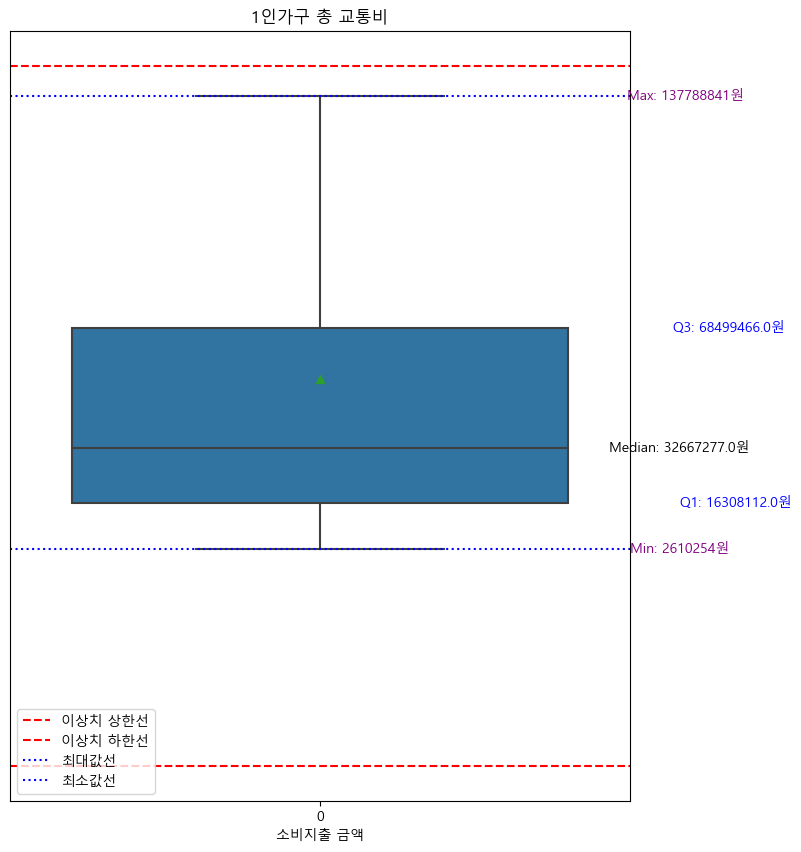

In [97]:
plt.rcParams["font.family"] = "Malgun Gothic"



fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=single_traffic_expend, showmeans=True)

Q1 = single_traffic_expend.quantile(0.25)
Q3 = single_traffic_expend.quantile(0.75)
Median = single_traffic_expend.median()   
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = single_traffic_expend.max()
min_value = single_traffic_expend.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('1인가구 총 교통비')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

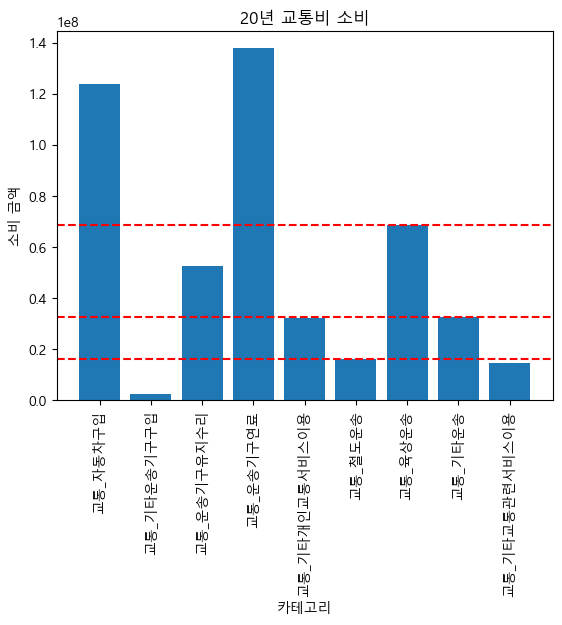

In [99]:
#그래프 그리기
import matplotlib.pyplot as plt

# total_traffic_expend = 1인가구 부분별 교통비 총합

quartile = np.percentile(single_traffic_expend, [25, 50, 75])  # 4분위수 계산


plt.rcParams['font.family'] ='Malgun Gothic'        # 한글 오류방지
plt.rcParams['axes.unicode_minus'] =False           # 한글 오류방지

plt.bar(single_traffic_expend.index, single_traffic_expend.values)  
plt.title('20년 교통비 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')



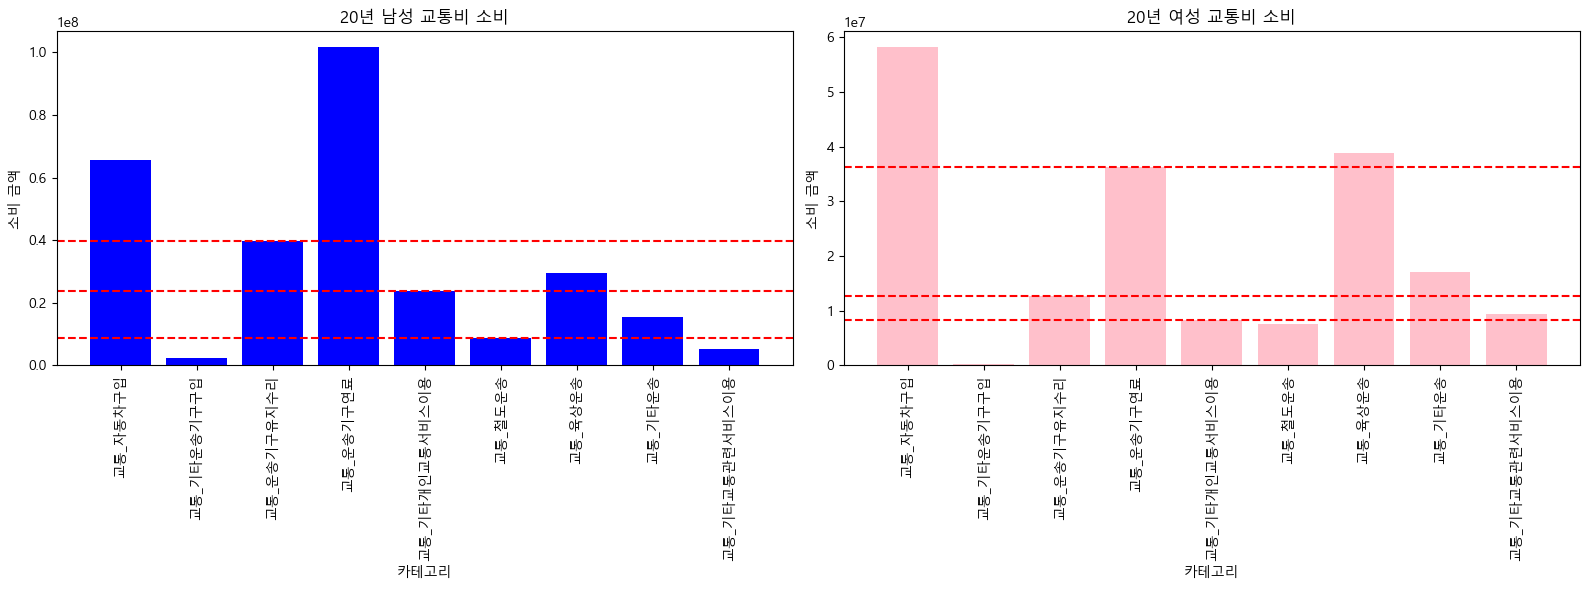

In [100]:
gender_group_single_traffic = condition_single.groupby('가구주_성별코드')        

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'pink']  # 남자는 파란색, 여자는 분홍색

for ax, (gender, data), color in zip(axes, gender_group_single_traffic, colors):
    traffic = data[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',        #교통관련 항목을 찾음
               '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']]
    traffic_sum = traffic.sum()                             # 그래프화 하기 위해 교통항목들을 다 더함
    quartile = np.percentile(traffic_sum, [25, 50, 75])  # 4분위수 계산
    ax.bar(traffic_sum.index, traffic_sum.values.T, color=color)  # 색상 설정
    ax.set_title(f'20년 {gender} 교통비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


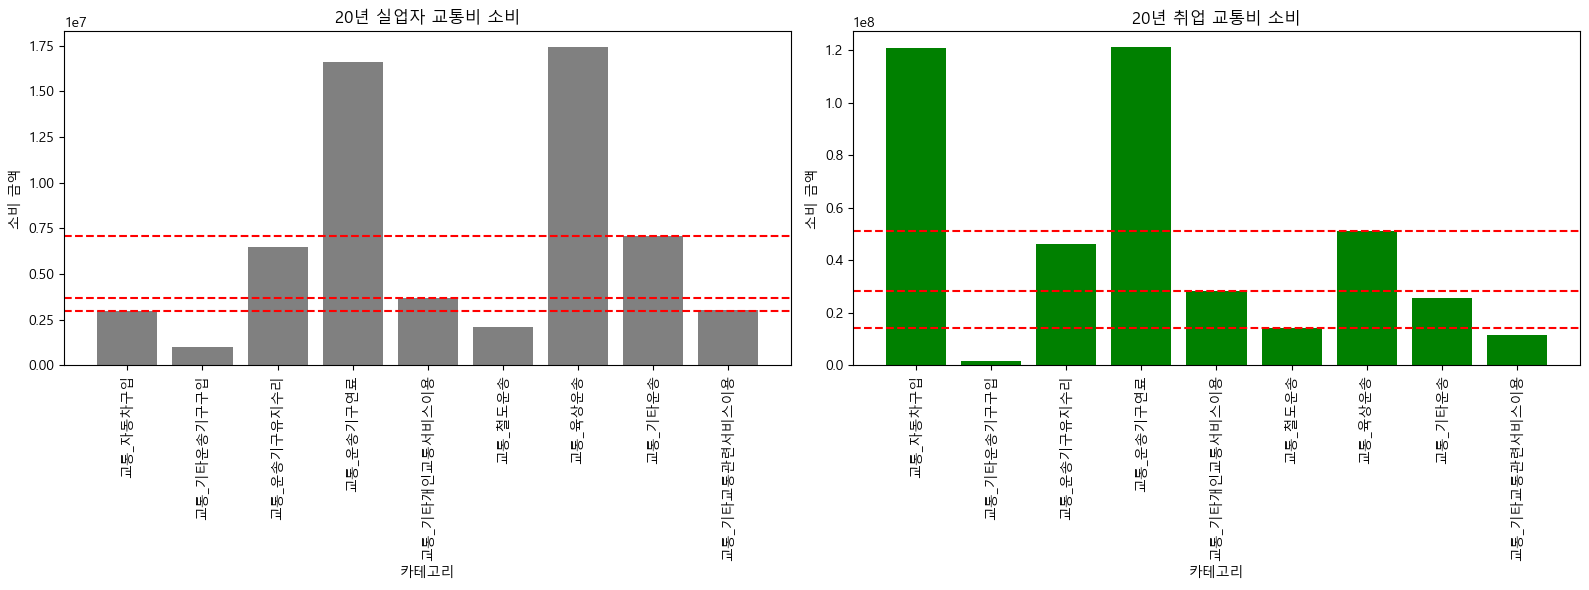

In [102]:
job_group_single = condition_single.groupby('가구주_취업여부')        #condition을 가구주 취업여부로 그룹화

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['gray', 'green']  # 취업은 회색, 비취업은 녹색

for ax, (job, data), color in zip(axes, job_group_single, colors):
    traffic = data[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',        #교통관련 항목을 찾음
               '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']]
    traffic_sum = traffic.sum()                             # 그래프화 하기 위해 교통항목들을 다 더함
    quartile = np.percentile(traffic_sum, [25, 50, 75])  # 4분위수 계산
    ax.bar(traffic_sum.index, traffic_sum.values.T, color=color)  # 색상 설정
    ax.set_title(f'20년 {job} 교통비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


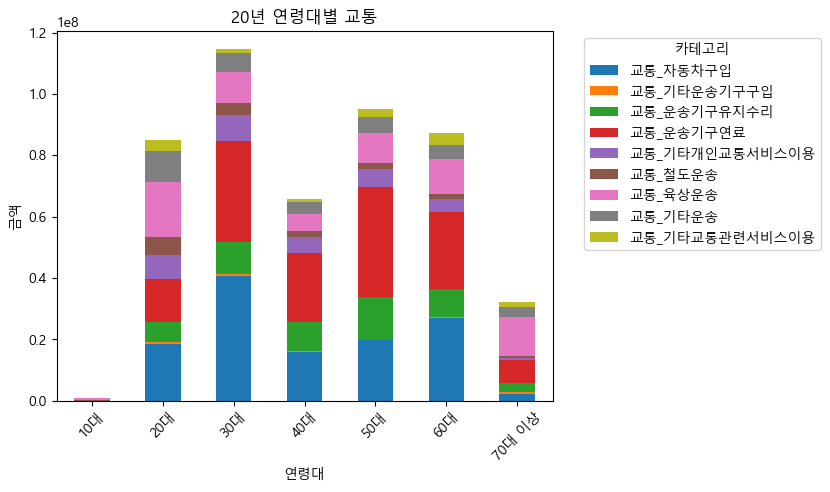

In [104]:
#연령대별로 분류

traffic_age_group = condition_single.groupby('연령대')[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']].sum()

#그래프 그리기
traffic_age_group.plot(kind='bar', stacked=True)
plt.title('20년 연령대별 교통')
plt.xlabel('연령대')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')



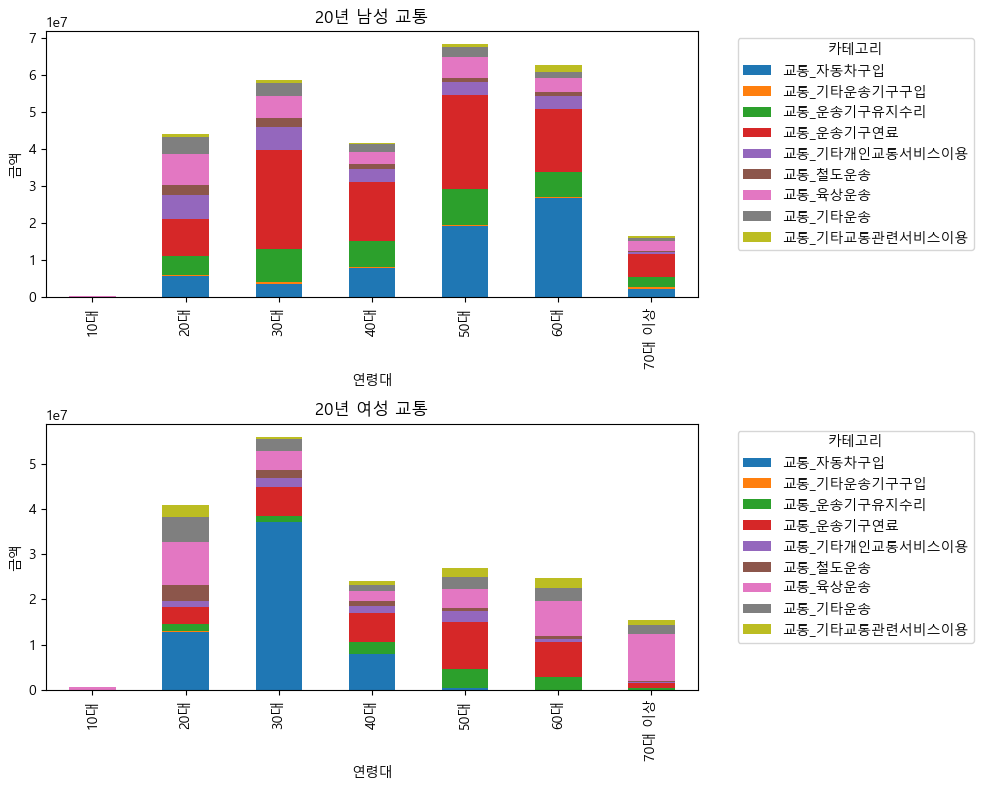

In [106]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 성별 및 연령대별로 데이터를 그룹화
traffic_age_gender_group = condition_single.groupby(['가구주_성별코드', '연령대'])[['교통_자동차구입','교통_기타운송기구구입','교통_운송기구유지수리','교통_운송기구연료','교통_기타개인교통서비스이용',
       '교통_철도운송','교통_육상운송','교통_기타운송','교통_기타교통관련서비스이용']].sum()

# 그래프 그리기
traffic_age_gender_group.loc['남성'].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('20년 남성 교통')
axes[0].set_xlabel('연령대')
axes[0].set_ylabel('금액')
axes[0].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

traffic_age_gender_group.loc['여성'].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('20년 여성 교통')
axes[1].set_xlabel('연령대')
axes[1].set_ylabel('금액')
axes[1].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


통신

In [107]:
# 1인가구 통신비 총합
import pandas as pd

condition_single = temp_df[temp_df['가구원수']==1]

single_cmnct_expend= condition_single[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']].sum()

result_cmnct = pd.DataFrame(single_cmnct_expend)
result_cmnct.columns = ['총합계']
single_cmnct_expend

통신_우편서비스이용       484479
통신_통신장비구입      46169016
통신_통신서비스이용    153624093
dtype: int64

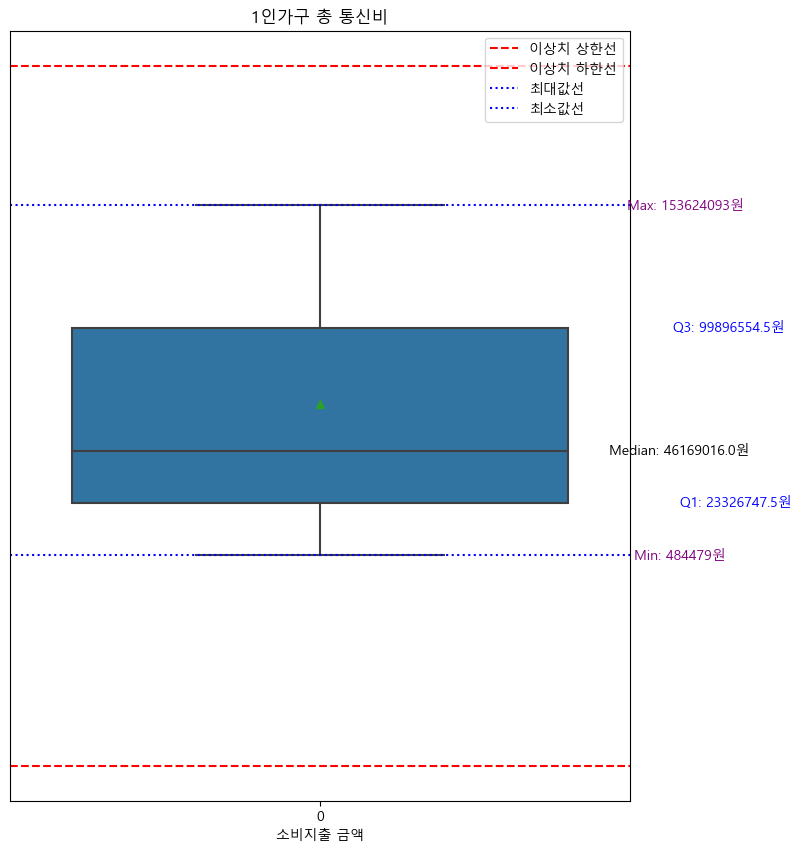

In [108]:
plt.rcParams["font.family"] = "Malgun Gothic"



fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=single_cmnct_expend, showmeans=True)

Q1 = single_cmnct_expend.quantile(0.25)
Q3 = single_cmnct_expend.quantile(0.75)
Median = single_cmnct_expend.median()   
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = single_cmnct_expend.max()
min_value = single_cmnct_expend.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('1인가구 총 통신비')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

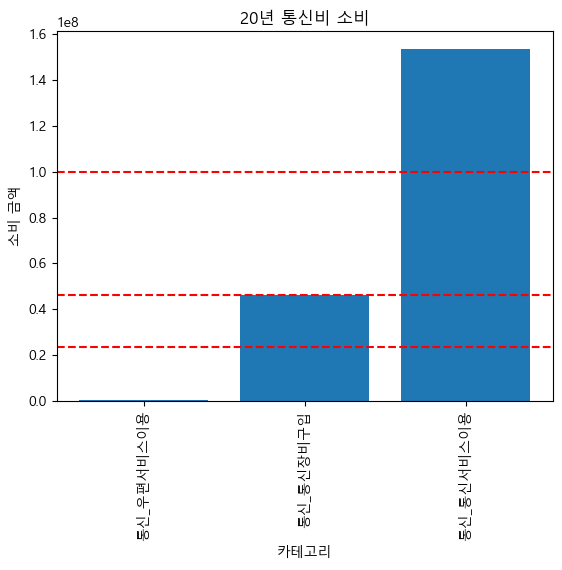

In [109]:
#그래프 그리기
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt






quartile = np.percentile(single_cmnct_expend, [25, 50, 75])  # 4분위수 계산


plt.rcParams['font.family'] ='Malgun Gothic'        # 한글 오류방지
plt.rcParams['axes.unicode_minus'] =False           # 한글 오류방지

plt.bar(single_cmnct_expend.index, single_cmnct_expend.values)
plt.title('20년 통신비 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')



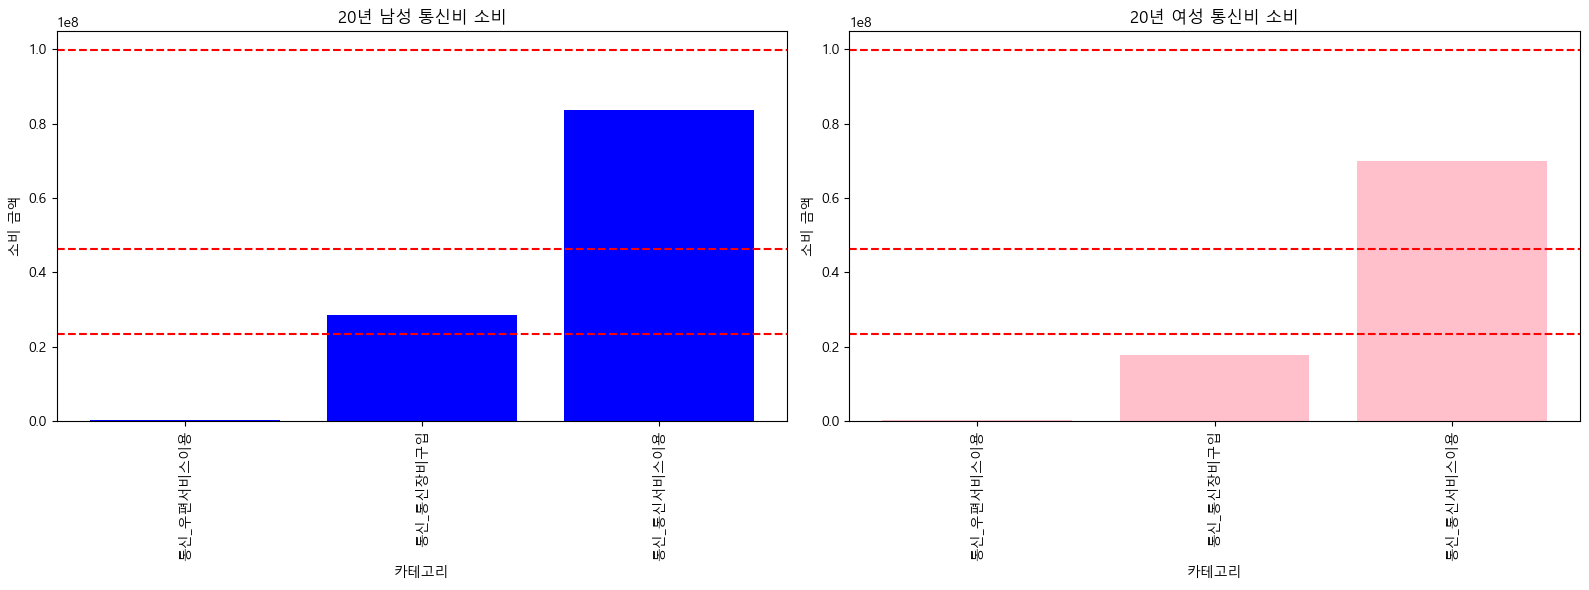

In [110]:
gender_group_single = condition_single.groupby('가구주_성별코드')        #temp_df 를 가구주_성별코드로 그룹화

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'pink']  # 남자는 파란색, 여자는 분홍색

for ax, (gender, data), color in zip(axes, gender_group_single, colors):
    cmnct= data[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']]
    cmnct_sum = cmnct.sum()
    quartile = np.percentile(single_cmnct_expend, [25, 50, 75])  # 4분위수 계산
    ax.bar(cmnct_sum.index, cmnct_sum.T.values, color=color)  # 색상 설정
    ax.set_title(f'20년 {gender} 통신비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


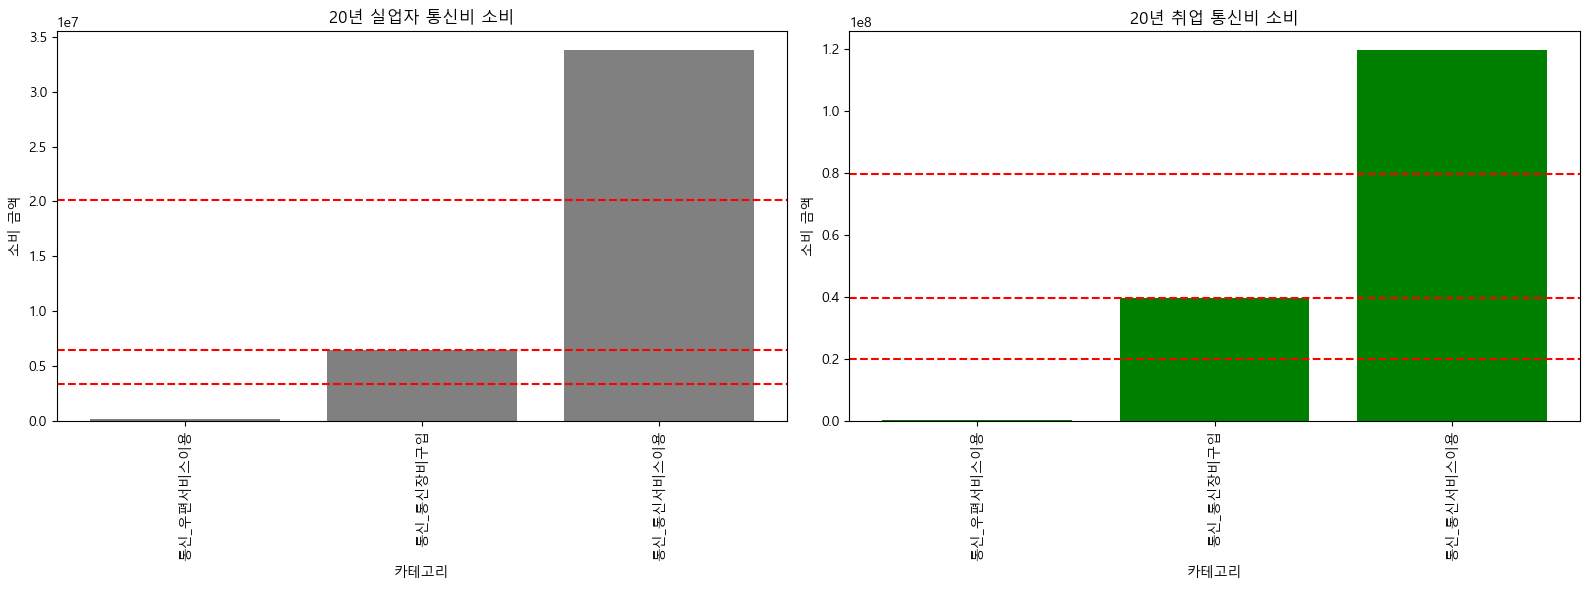

In [111]:
job_group_single = condition_single.groupby('가구주_취업여부')        #condition을 가구주 취업여부로 그룹화

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['gray', 'green']  # 취업은 회색, 비취업은 녹색

for ax, (job, data), color in zip(axes, job_group_single, colors):
    cmnct = data[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']]
    cmnct_sum = cmnct.sum()                             # 그래프화 하기 위해 교통항목들을 다 더함
    quartile = np.percentile(cmnct_sum, [25, 50, 75])  # 4분위수 계산
    ax.bar(cmnct_sum.index, cmnct_sum.values.T, color=color)  # 색상 설정
    ax.set_title(f'20년 {job} 통신비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


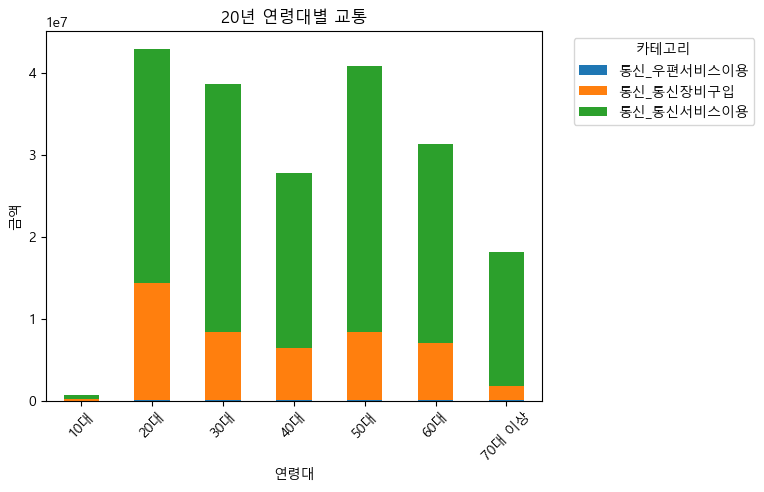

In [112]:
#연령대별로 분류

cmnct_age_group = condition_single.groupby('연령대')[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']].sum()

#그래프 그리기
cmnct_age_group.plot(kind='bar', stacked=True)
plt.title('20년 연령대별 교통')
plt.xlabel('연령대')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

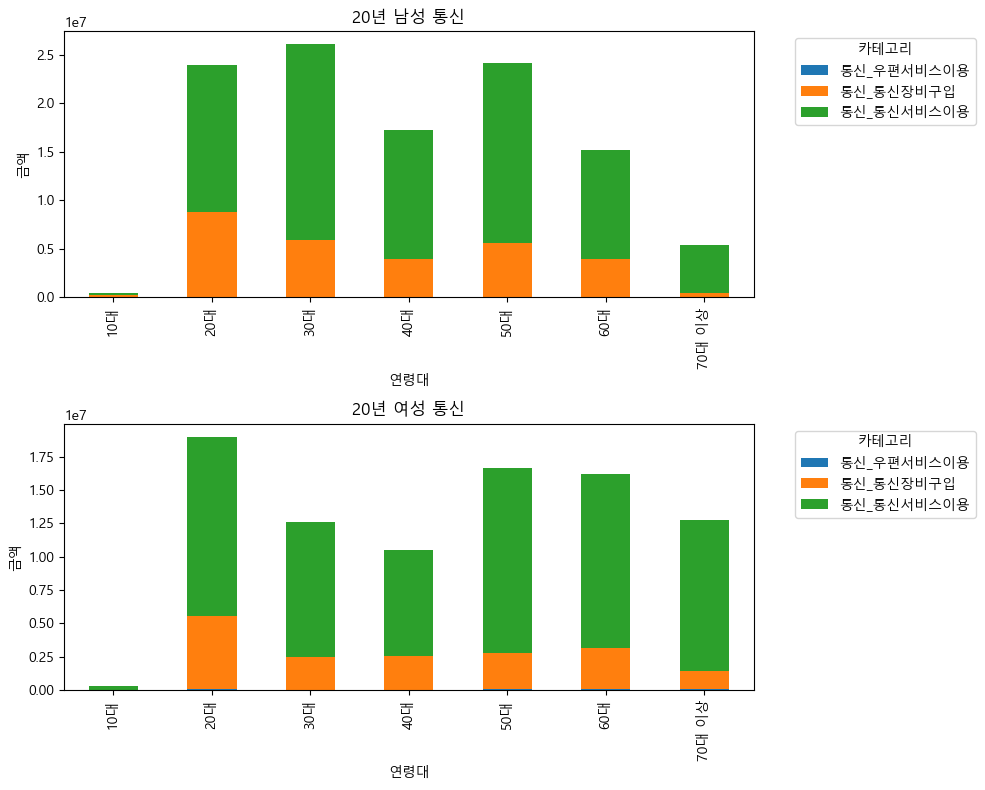

In [113]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 성별 및 연령대별로 데이터를 그룹화
cmnct_age_gender_group = condition_single.groupby(['가구주_성별코드', '연령대'])[['통신_우편서비스이용','통신_통신장비구입','통신_통신서비스이용']].sum()


# 그래프 그리기
cmnct_age_gender_group.loc['남성'].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('20년 남성 통신')
axes[0].set_xlabel('연령대')
axes[0].set_ylabel('금액')
axes[0].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

cmnct_age_gender_group.loc['여성'].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('20년 여성 통신')
axes[1].set_xlabel('연령대')
axes[1].set_ylabel('금액')
axes[1].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


오락문화

In [114]:
# 1인가구 오락문화비 총합
import pandas as pd

condition_single  = temp_df[temp_df['가구원수']==1]

single_culture_expend= condition_single [['오락문화_영상음향기기구입','오락문화_사진광학장비구입','오락문화_정보처리장치구입','오락문화_기록매체구입','오락문화_영상음향정보기기수리',
              '오락문화_내구재구입','오락문화_악기기구구입','오락문화_오락문화내구재유지수리','오락문화_장난감취미용품구입','오락문화_캠핑운동관련용품구입',
              '오락문화_화훼관련용품구입','애완동물_물품구입','애완동물_서비스이용','운동오락_서비스이용','문화_서비스이용','복권_구입비','서적_구입비',
              '인쇄물_구입비','문구_구입비','단체여행_경비']].sum()

result_culture = pd.DataFrame(single_culture_expend)
result_culture.columns = ['총합계']
single_culture_expend

오락문화_영상음향기기구입       13507152
오락문화_사진광학장비구입        1214406
오락문화_정보처리장치구입       33349644
오락문화_기록매체구입          1245962
오락문화_영상음향정보기기수리      1967563
오락문화_내구재구입           1172071
오락문화_악기기구구입          1519084
오락문화_오락문화내구재유지수리      950969
오락문화_장난감취미용품구입       6356562
오락문화_캠핑운동관련용품구입     11494814
오락문화_화훼관련용품구입        9827996
애완동물_물품구입           17094837
애완동물_서비스이용           9349684
운동오락_서비스이용          36522724
문화_서비스이용            84975539
복권_구입비               2389315
서적_구입비               8930531
인쇄물_구입비              1687824
문구_구입비               3828374
단체여행_경비             18138092
dtype: int64

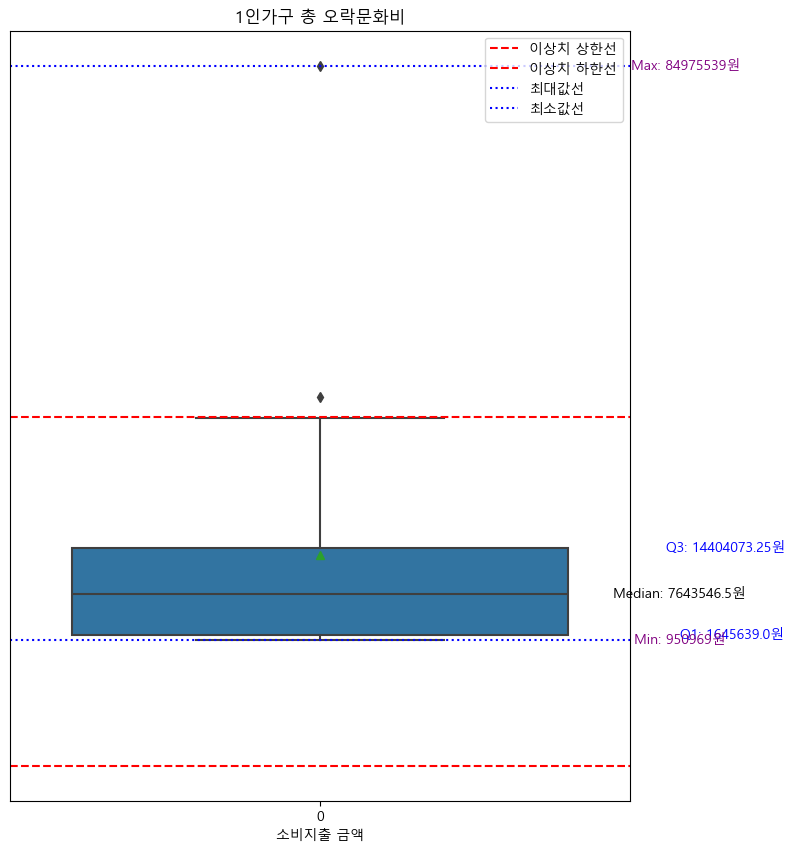

In [115]:
plt.rcParams["font.family"] = "Malgun Gothic"



fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=single_culture_expend, showmeans=True)

Q1 = single_culture_expend.quantile(0.25)
Q3 = single_culture_expend.quantile(0.75)
Median = single_culture_expend.median()   
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = single_culture_expend.max()
min_value = single_culture_expend.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('1인가구 총 오락문화비')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

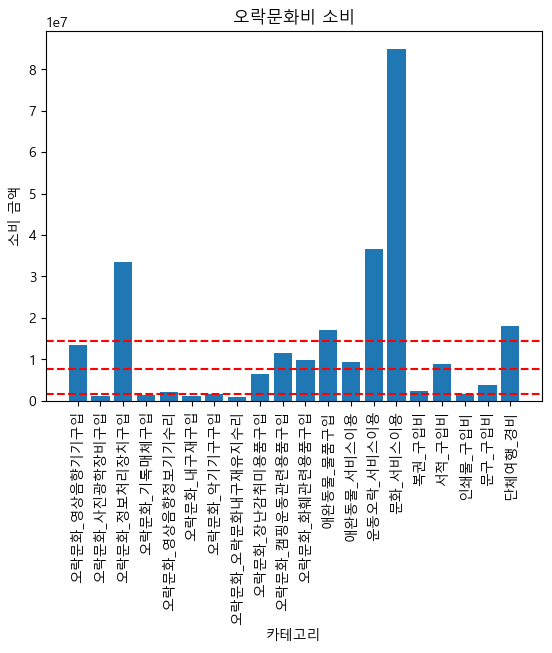

In [116]:
#그래프 그리기
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt







quartile = np.percentile(single_culture_expend, [25, 50, 75])  # 4분위수 계산


plt.rcParams['font.family'] ='Malgun Gothic'        # 한글 오류방지
plt.rcParams['axes.unicode_minus'] =False           # 한글 오류방지

plt.bar(single_culture_expend.index, single_culture_expend.values)
plt.title('오락문화비 소비')
plt.xlabel('카테고리')
plt.ylabel('소비 금액')
plt.xticks(rotation=90)

for q in quartile:
    plt.axhline(y=q, color='r', linestyle='--')



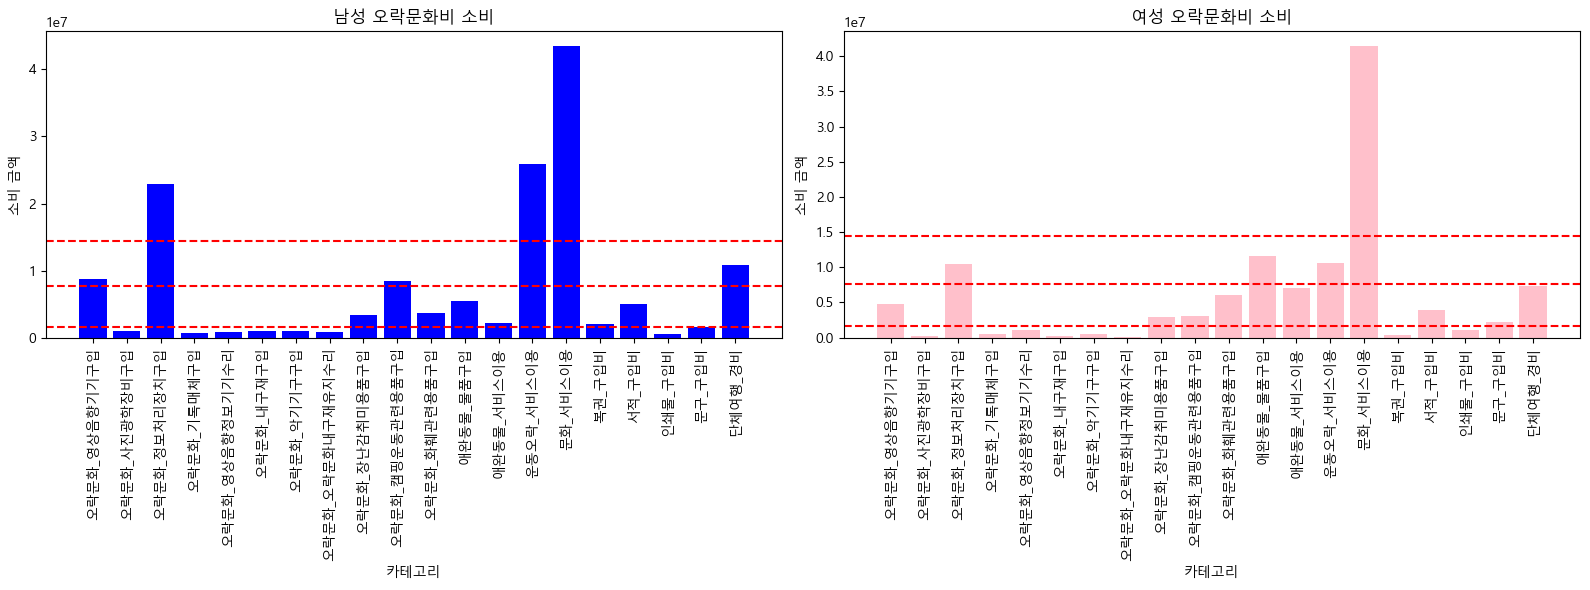

In [121]:
gender_group_single = condition_single.groupby('가구주_성별코드')        #temp_df 를 가구주_성별코드로 그룹화

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'pink']  # 남자는 파란색, 여자는 분홍색

for ax, (gender, data), color in zip(axes, gender_group_single, colors):
    culture= data[['오락문화_영상음향기기구입','오락문화_사진광학장비구입','오락문화_정보처리장치구입','오락문화_기록매체구입','오락문화_영상음향정보기기수리',
              '오락문화_내구재구입','오락문화_악기기구구입','오락문화_오락문화내구재유지수리','오락문화_장난감취미용품구입','오락문화_캠핑운동관련용품구입',
              '오락문화_화훼관련용품구입','애완동물_물품구입','애완동물_서비스이용','운동오락_서비스이용','문화_서비스이용','복권_구입비','서적_구입비',
              '인쇄물_구입비','문구_구입비','단체여행_경비']]
    culture_sum = culture.sum()
    quartile = np.percentile(single_culture_expend, [25, 50, 75])  # 4분위수 계산
    ax.bar(culture_sum.index, culture_sum.T.values, color=color)  # 색상 설정
    ax.set_title(f'{gender} 오락문화비 소비')
    ax.set_xlabel('카테고리')
    ax.set_ylabel('소비 금액')
    ax.tick_params(axis='x', rotation=90)
    for q in quartile:
        ax.axhline(y=q, color='r', linestyle='--')

plt.tight_layout()
plt.show()


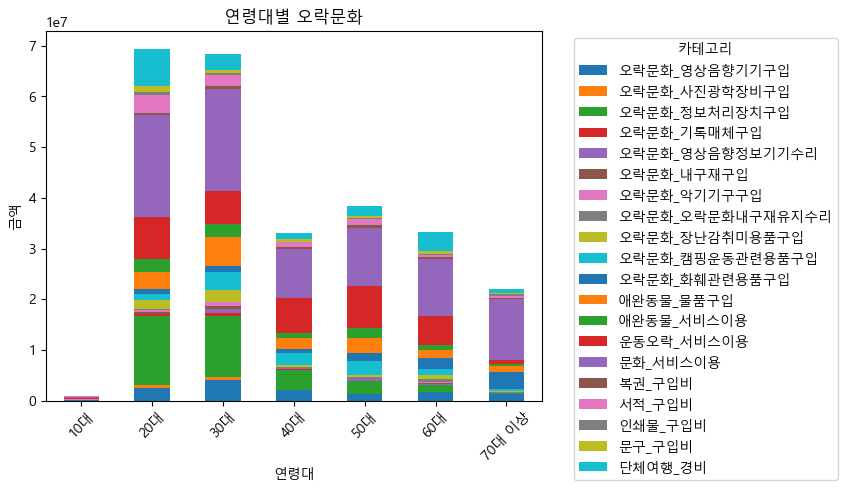

In [118]:
#연령대별로 분류

culture_age_group = condition_single.groupby('연령대')[['오락문화_영상음향기기구입','오락문화_사진광학장비구입','오락문화_정보처리장치구입','오락문화_기록매체구입','오락문화_영상음향정보기기수리',
                '오락문화_내구재구입','오락문화_악기기구구입','오락문화_오락문화내구재유지수리','오락문화_장난감취미용품구입','오락문화_캠핑운동관련용품구입',
                '오락문화_화훼관련용품구입','애완동물_물품구입','애완동물_서비스이용','운동오락_서비스이용','문화_서비스이용','복권_구입비','서적_구입비',
                '인쇄물_구입비','문구_구입비','단체여행_경비']].sum()

#그래프 그리기
culture_age_group.plot(kind='bar', stacked=True)
plt.title('연령대별 오락문화')
plt.xlabel('연령대')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

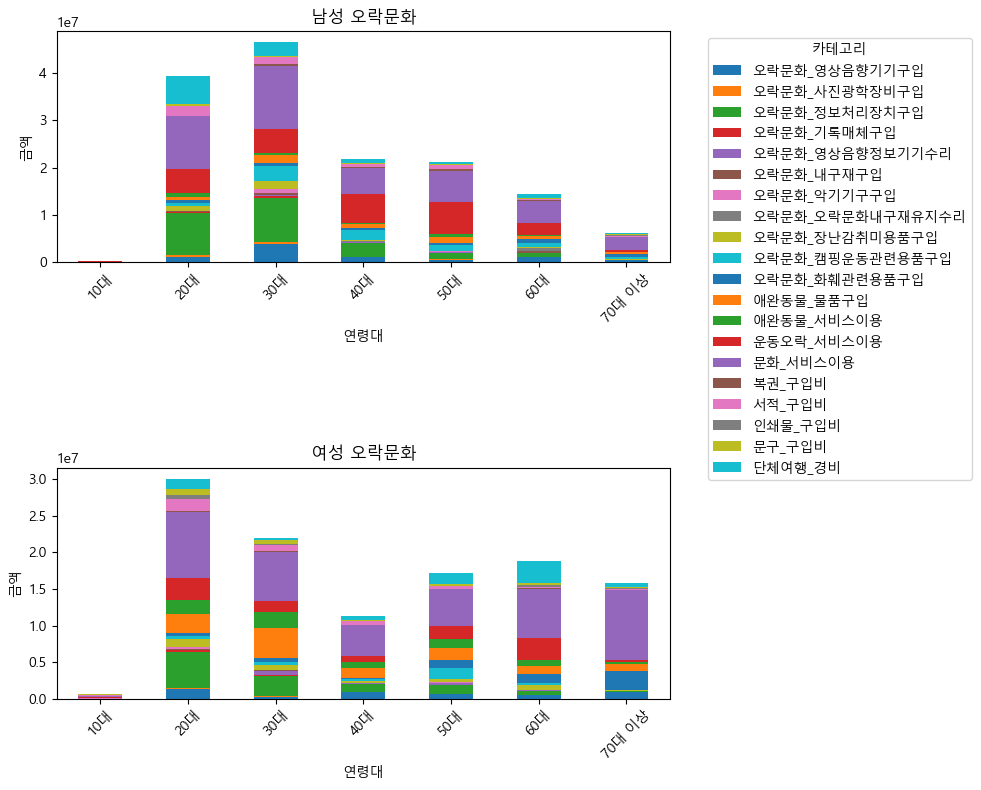

In [119]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# 성별 및 연령대별로 데이터를 그룹화
culture_age_gender_group = condition_single.groupby(['가구주_성별코드','연령대'])[['오락문화_영상음향기기구입','오락문화_사진광학장비구입','오락문화_정보처리장치구입','오락문화_기록매체구입','오락문화_영상음향정보기기수리',
              '오락문화_내구재구입','오락문화_악기기구구입','오락문화_오락문화내구재유지수리','오락문화_장난감취미용품구입','오락문화_캠핑운동관련용품구입',
              '오락문화_화훼관련용품구입','애완동물_물품구입','애완동물_서비스이용','운동오락_서비스이용','문화_서비스이용','복권_구입비','서적_구입비',
              '인쇄물_구입비','문구_구입비','단체여행_경비']].sum()


# 그래프 그리기
culture_age_gender_group.loc['남성'].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('남성 오락문화')
axes[0].set_xlabel('연령대')
axes[0].set_ylabel('금액')
axes[0].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)  # x 라벨 회전



culture_age_gender_group.loc['여성'].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('여성 오락문화')
axes[1].set_xlabel('연령대')
axes[1].set_ylabel('금액')
axes[1].legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].legend().remove()  # 범례 삭제
axes[1].tick_params(axis='x', rotation=45)  # x 라벨 회전


plt.tight_layout()
plt.show()

In [124]:

# 교통비 비율

total_traffic = temp_df['교통비']
total_traffic_mean = total_traffic.mean()
tatal_traffic_per = (total_traffic_mean / total_expend_mean) *100

print(f"전체가구 소비 중 교통비 비율: {total_traffic_mean:,}원 ({tatal_traffic_per:.2f}%)")

#통신비 비율

total_cmnct = temp_df['교통비']
total_cmnct_mean = total_cmnct.mean()
tatal_cmnct_per = (total_cmnct_mean / total_expend_mean) *100

print(f"전체가구 소비 중 통신비 비율: {total_cmnct_mean:,}원 ({tatal_cmnct_per:.2f}%)")



전체가구 소비 중 교통비 비율: 279,250.1353737007원 (12.17%)
전체가구 소비 중 통신비 비율: 279,250.1353737007원 (12.17%)
